In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("wine.csv")
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [8]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

Numeric columns: ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']


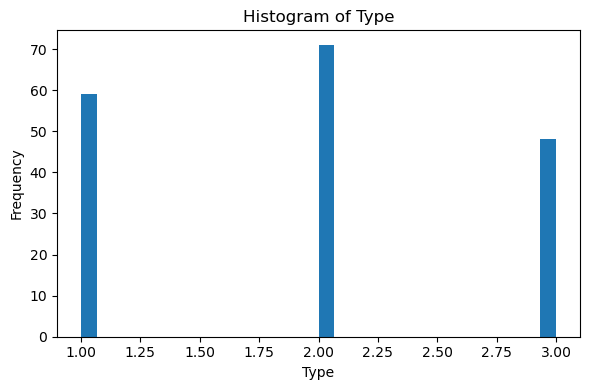

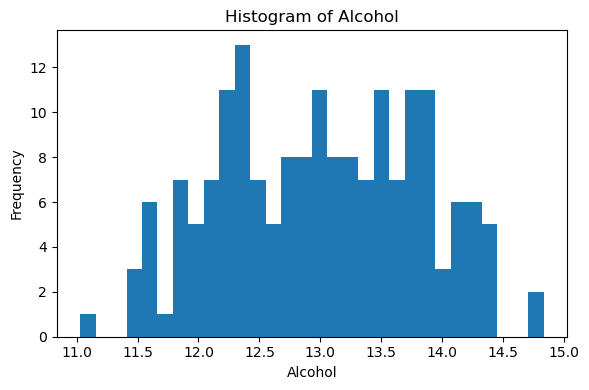

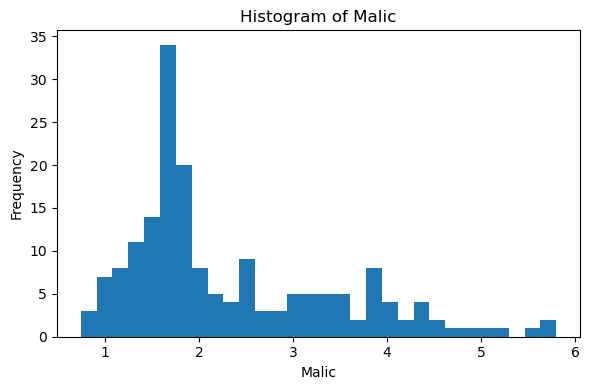

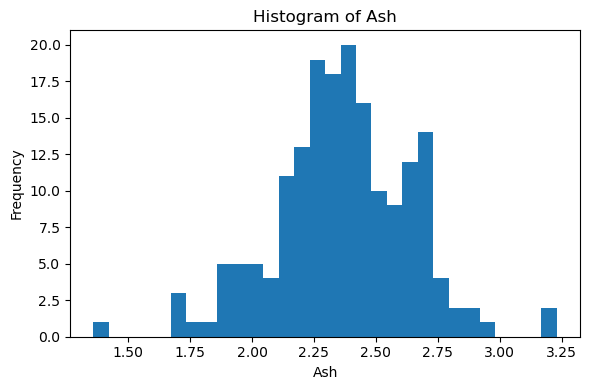

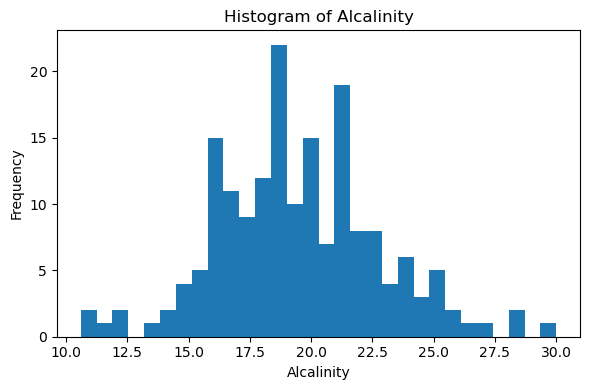

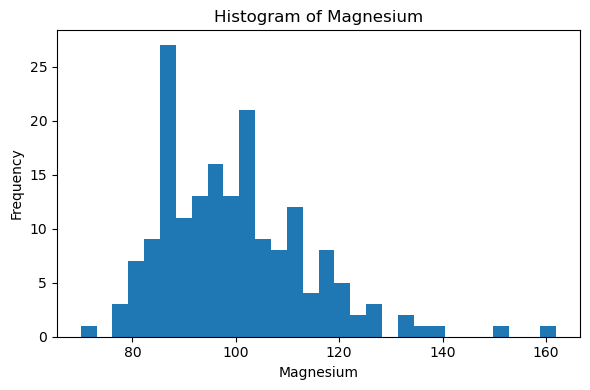

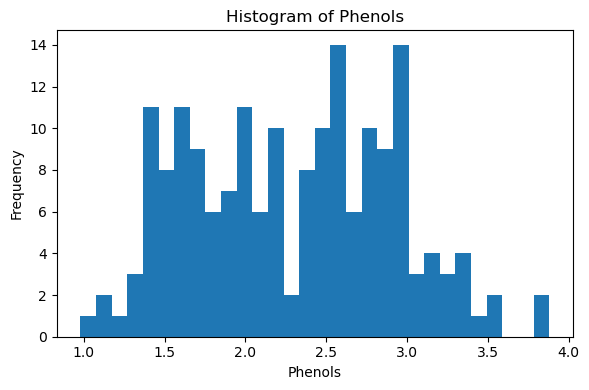

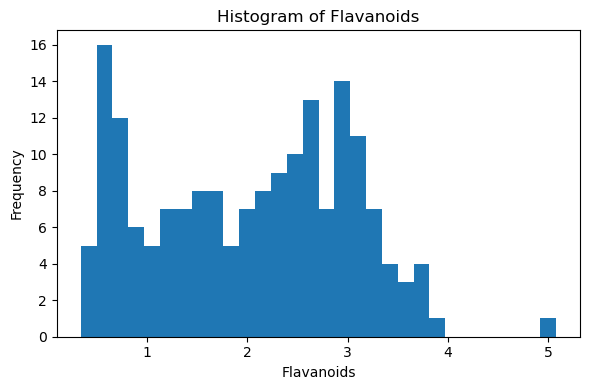

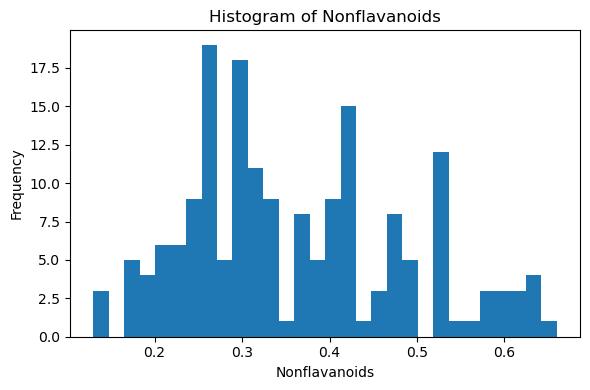

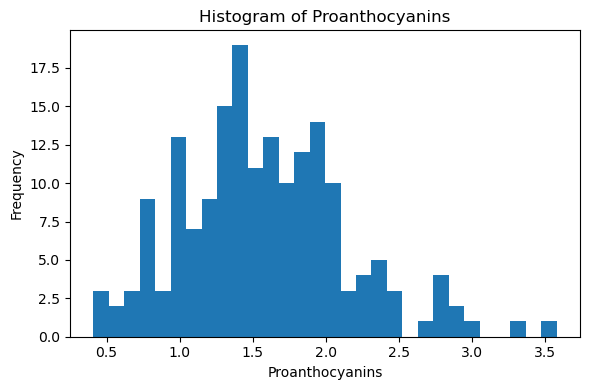

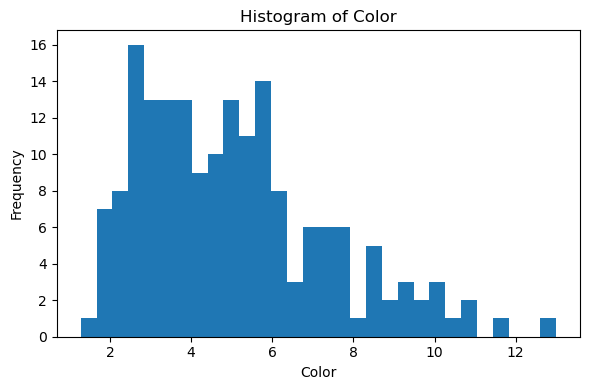

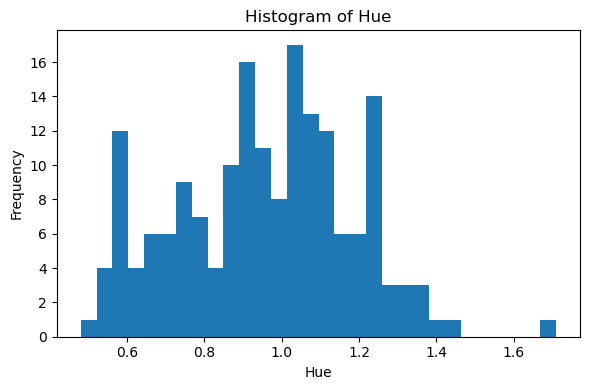

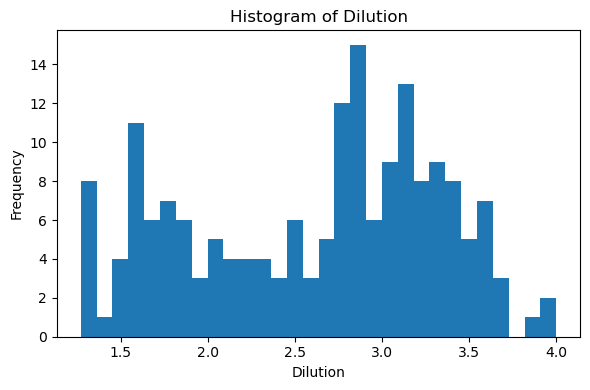

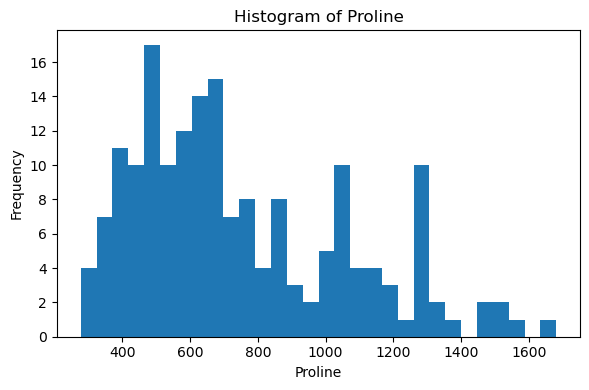

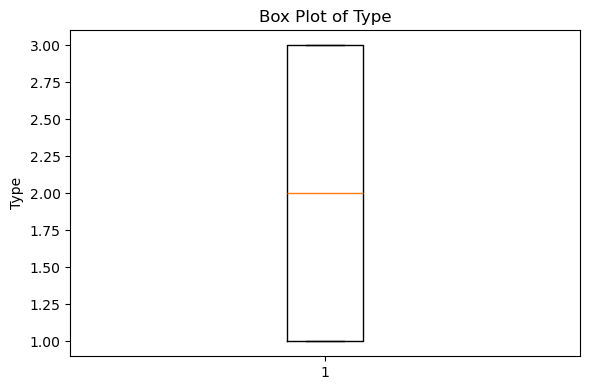

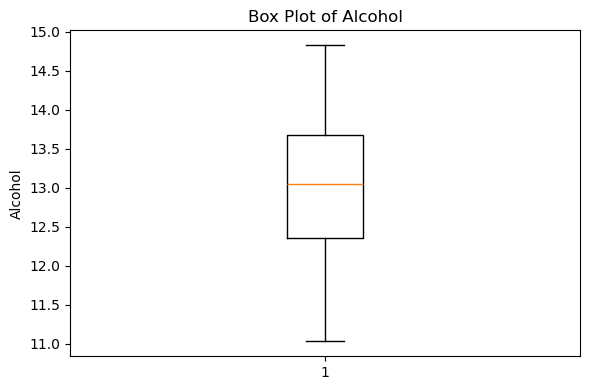

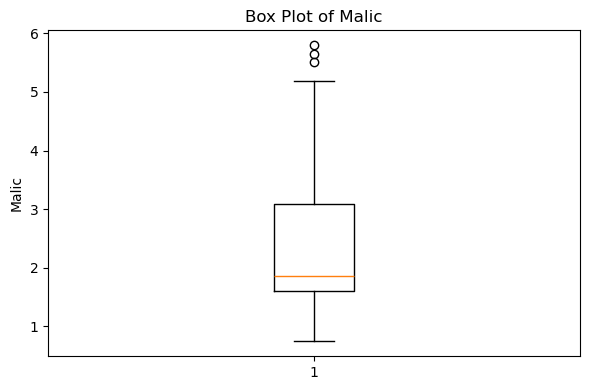

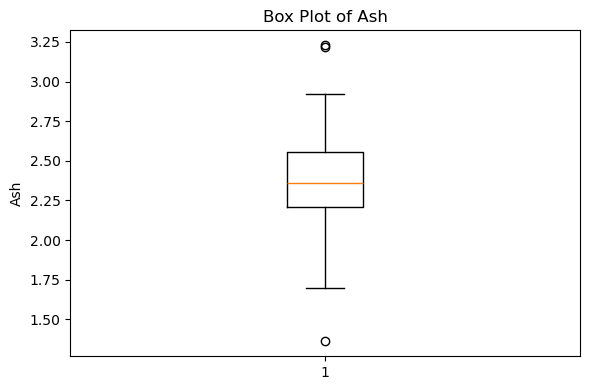

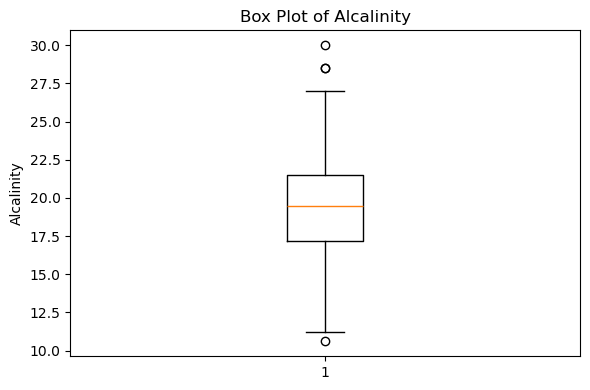

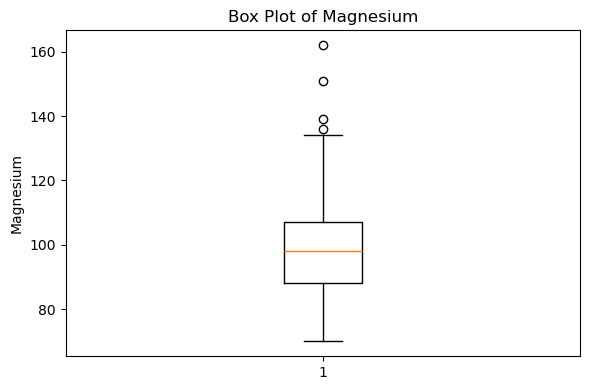

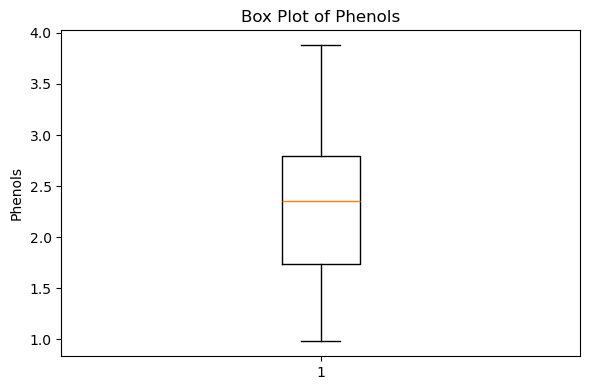

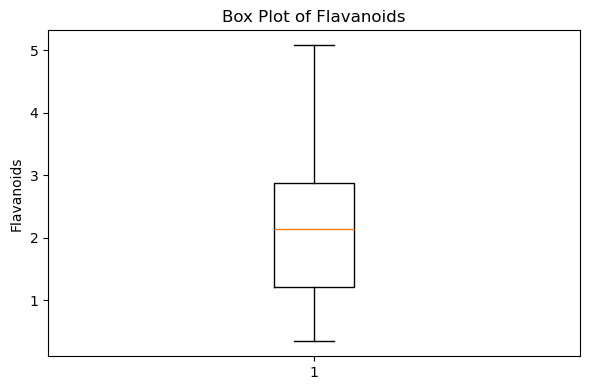

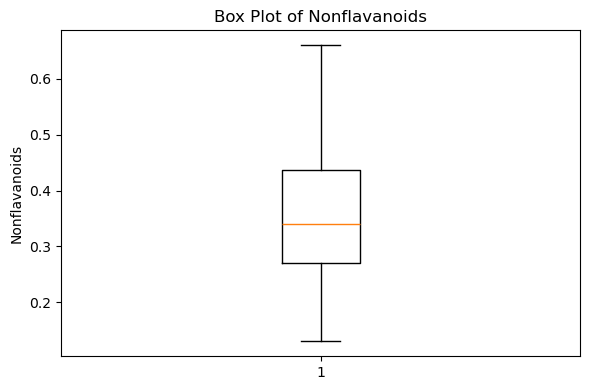

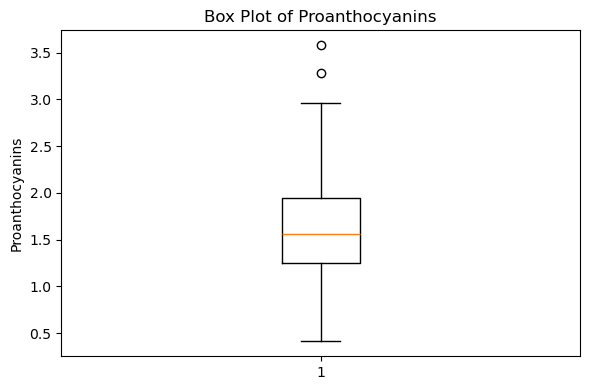

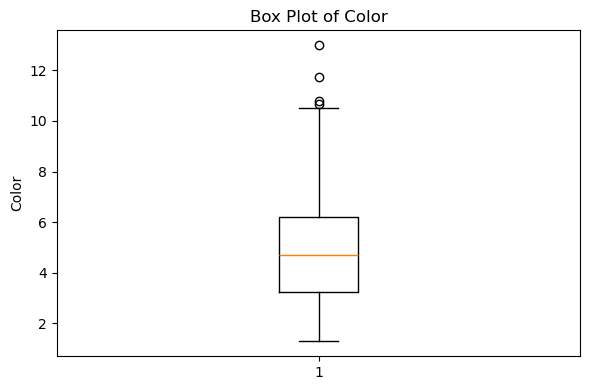

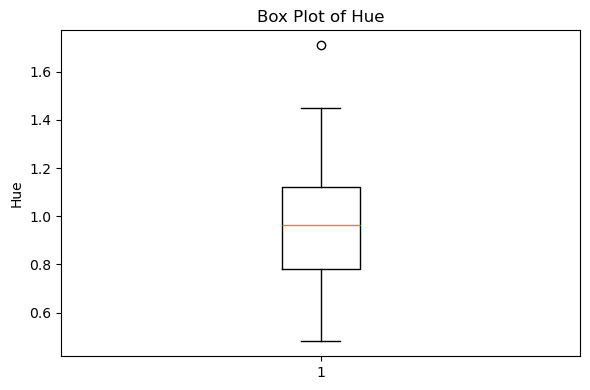

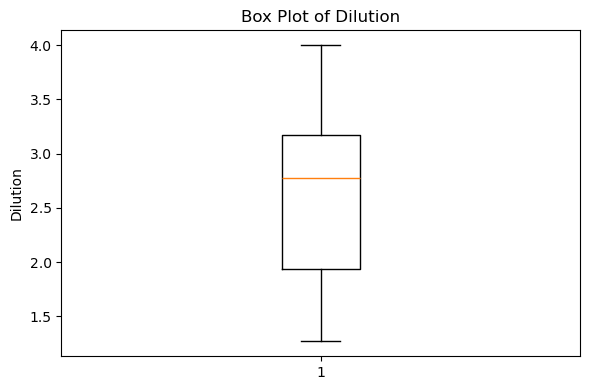

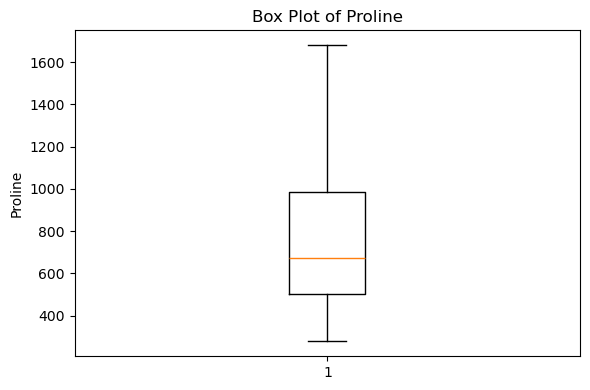

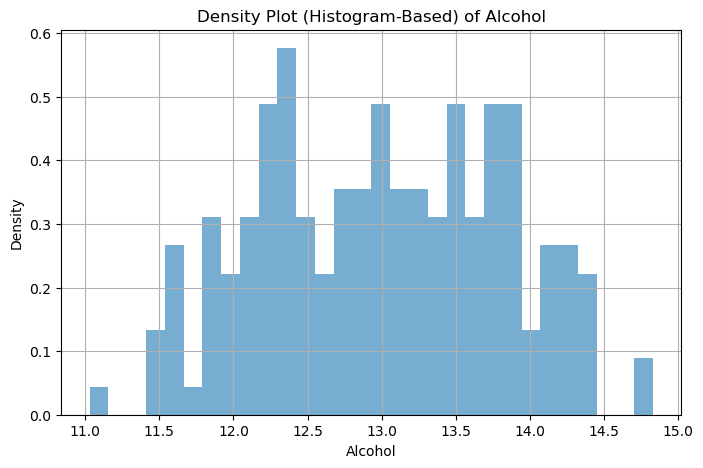

In [12]:
import matplotlib.pyplot as plt

# Select numerical columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()

print("Numeric columns:", numeric_cols)

# ---------------------------
# 1. HISTOGRAMS
# ---------------------------
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# ---------------------------
# 2. BOX PLOTS
# ---------------------------
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=True)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ---------------------------
# 3. DENSITY PLOTS
# ---------------------------

col = "Alcohol"   # change as needed

plt.figure(figsize=(8,5))
plt.hist(df[col], bins=30, density=True, alpha=0.6)
plt.title(f"Density Plot (Histogram-Based) of {col}")
plt.xlabel(col)
plt.ylabel("Density")
plt.grid(True)
plt.show()


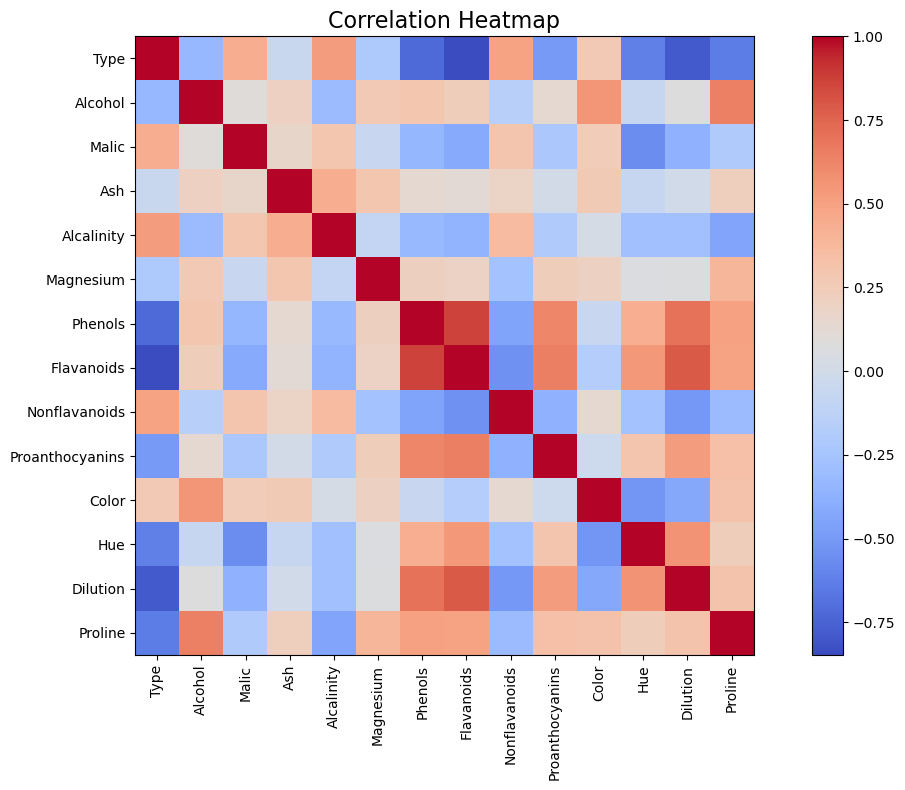

In [16]:
import numpy as np
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot correlation heatmap using Matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")

plt.title("Correlation Heatmap", fontsize=16)
plt.colorbar()

# Add feature names to x and y axis
ticks = np.arange(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=90)
plt.yticks(ticks, corr.columns)

plt.tight_layout()
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Select only numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# ---------------------------
# 1. STANDARDIZATION
# ---------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

# ---------------------------
# 2. PCA IMPLEMENTATION
# ---------------------------
pca = PCA()  # keep all components
pca_data = pca.fit_transform(scaled_data)

# Convert PCA output into dataframe
pca_df = pd.DataFrame(
    pca_data,
    columns=[f'PC{i+1}' for i in range(pca_data.shape[1])]
)

print("PCA Completed Successfully!")
print(pca_df.head())


PCA Completed Successfully!
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716  0.573876   
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309 -0.029716   
2 -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842  0.488305   
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616 -0.398364   
4 -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762  0.447876   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0 -0.055637 -0.458765 -1.065570 -0.420494  0.552928 -0.302978  0.200857  
1 -1.010372  0.218806  0.020182 -0.130020  0.394971 -0.146645  0.126402  
2  0.268957  1.222769  0.106249 -0.279074  0.001898  0.021278 -0.055752  
3 -0.618844 -0.114658 -0.107671  0.773866 -0.230929 -0.501277  0.019903  
4 -0.434937 -0.261548 -0.112434 -0.537931 -0.226686  0.274109 -0.517498  


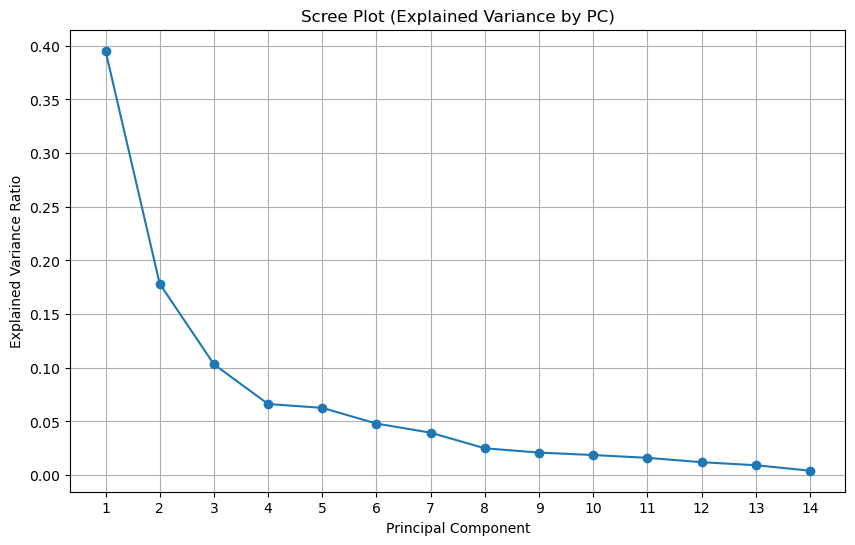

In [21]:
# Explained variance ratios
evr = pca.explained_variance_ratio_
cev = evr.cumsum()
#scree plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(evr)+1), evr, marker='o')
plt.title("Scree Plot (Explained Variance by PC)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(evr)+1))
plt.grid(True)
plt.show()


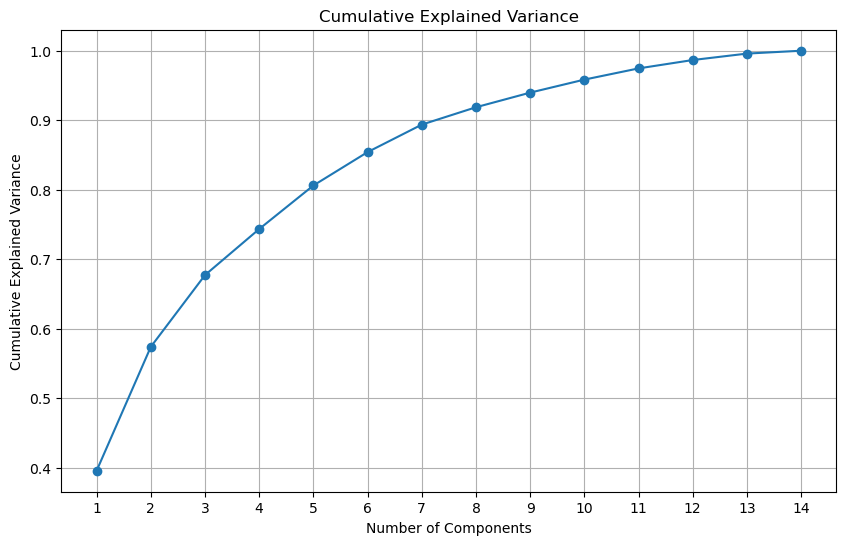

In [24]:
#Cumulative Explained Variance plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cev)+1), cev, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(range(1, len(cev)+1))
plt.grid(True)
plt.show()


In [26]:
# Create PCA feature names: PC1, PC2, PC3...
pca_columns = [f"PC{i+1}" for i in range(pca_data.shape[1])]

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# View first few rows
print(pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716  0.573876   
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309 -0.029716   
2 -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842  0.488305   
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616 -0.398364   
4 -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762  0.447876   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0 -0.055637 -0.458765 -1.065570 -0.420494  0.552928 -0.302978  0.200857  
1 -1.010372  0.218806  0.020182 -0.130020  0.394971 -0.146645  0.126402  
2  0.268957  1.222769  0.106249 -0.279074  0.001898  0.021278 -0.055752  
3 -0.618844 -0.114658 -0.107671  0.773866 -0.230929 -0.501277  0.019903  
4 -0.434937 -0.261548 -0.112434 -0.537931 -0.226686  0.274109 -0.517498  


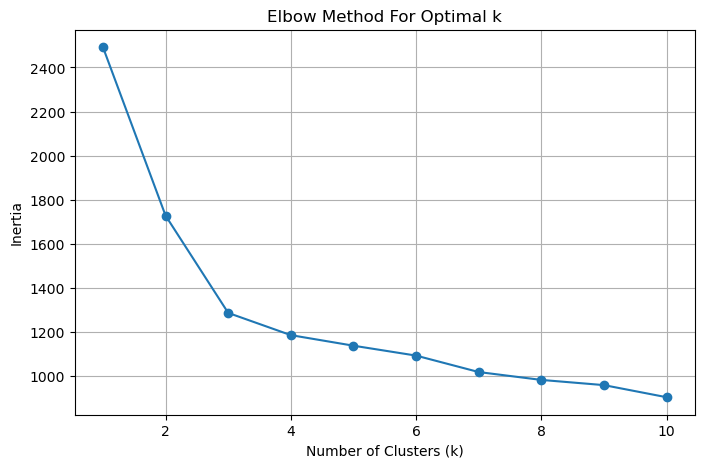

In [30]:
#Apply a clustering algorithm (e.g., K-means) to the original dataset
scaled_df = pd.DataFrame(scaled_data, columns=num_df.columns)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.grid(True)
plt.show()


In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to dataset
df['Cluster'] = clusters


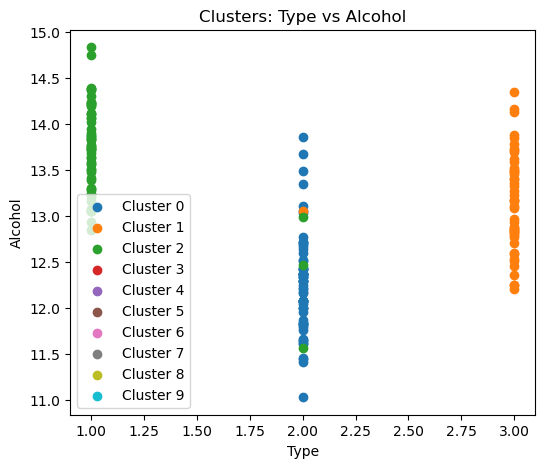

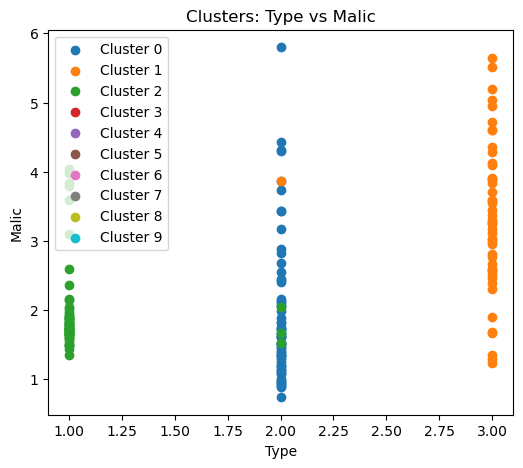

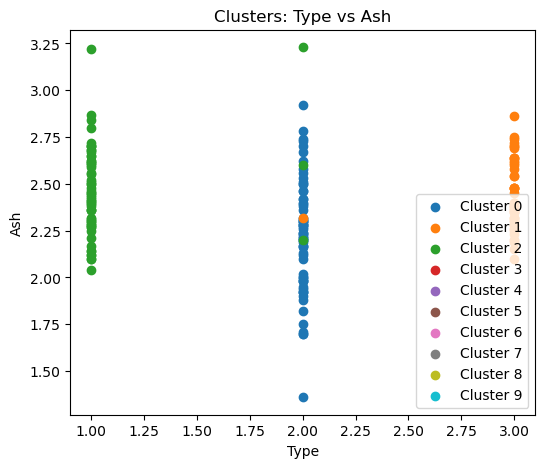

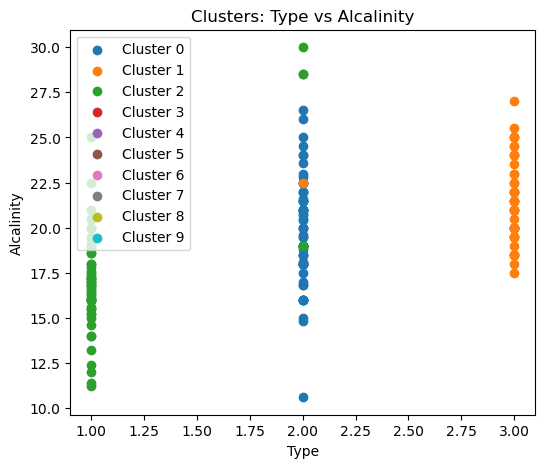

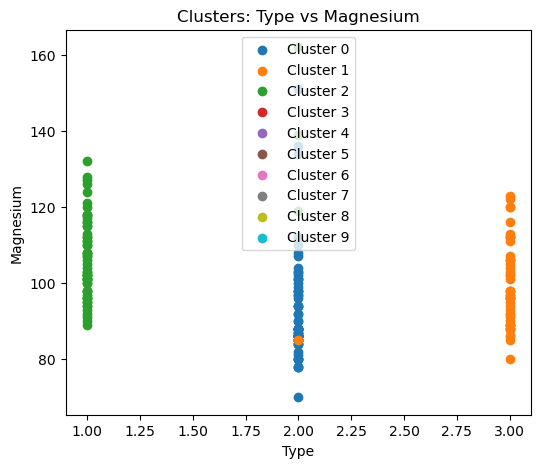

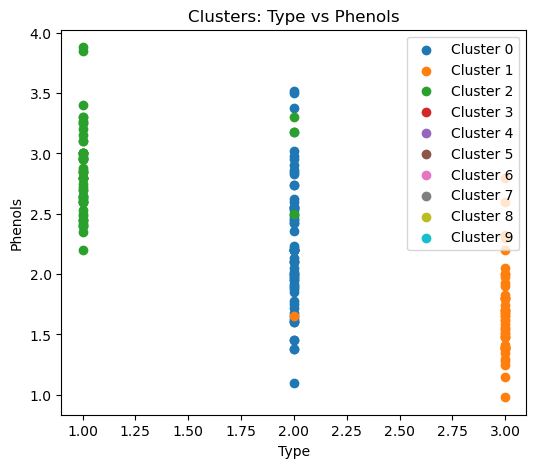

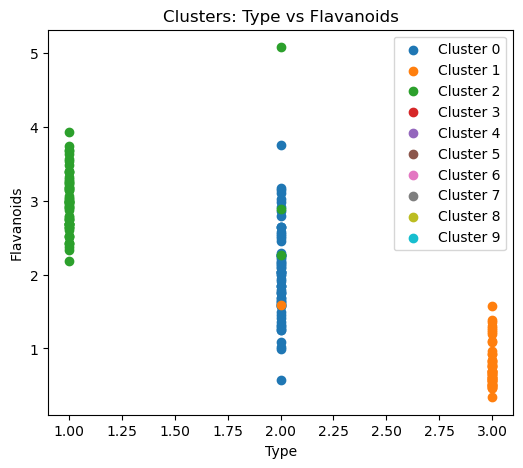

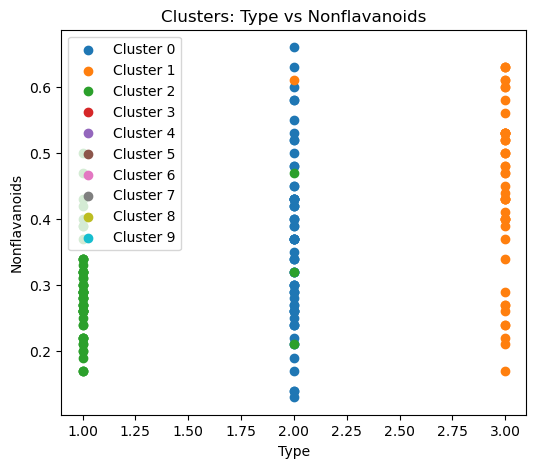

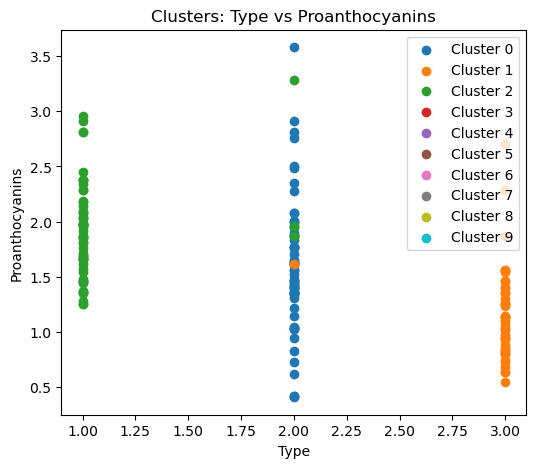

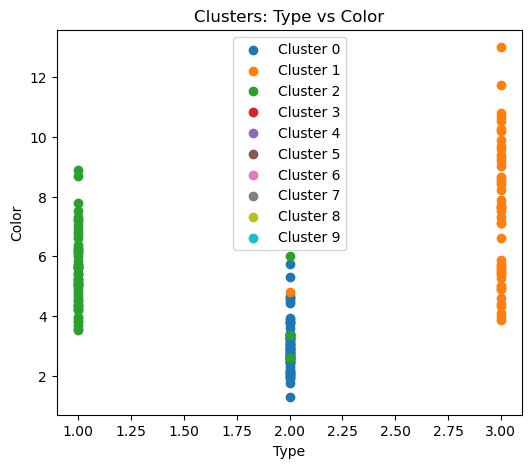

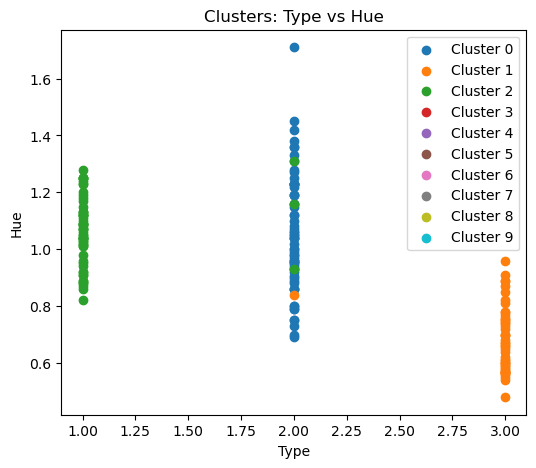

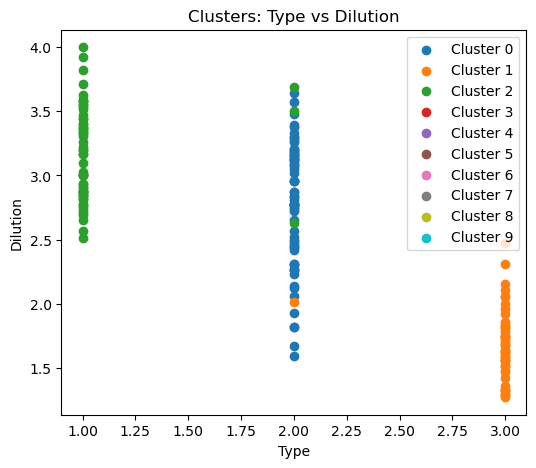

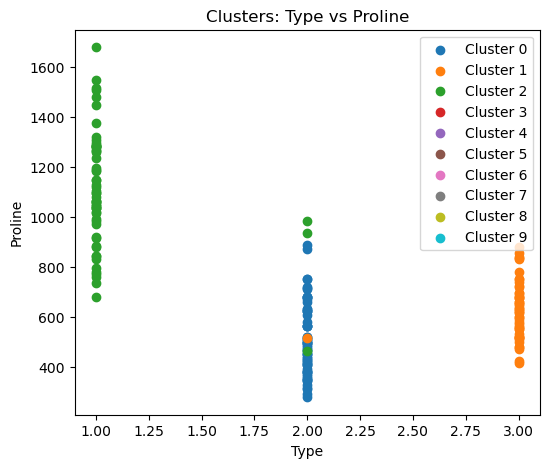

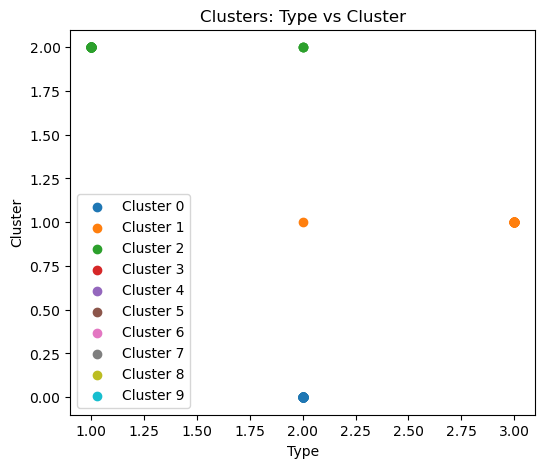

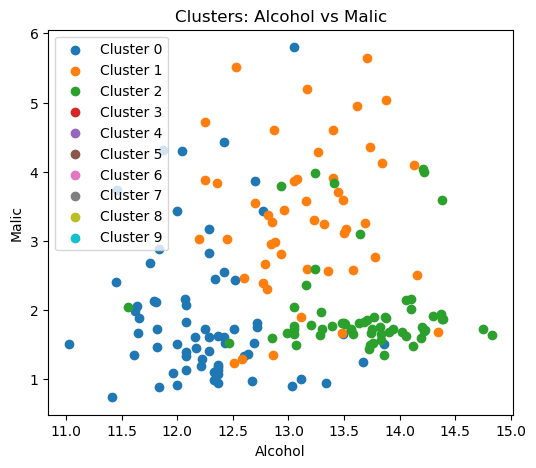

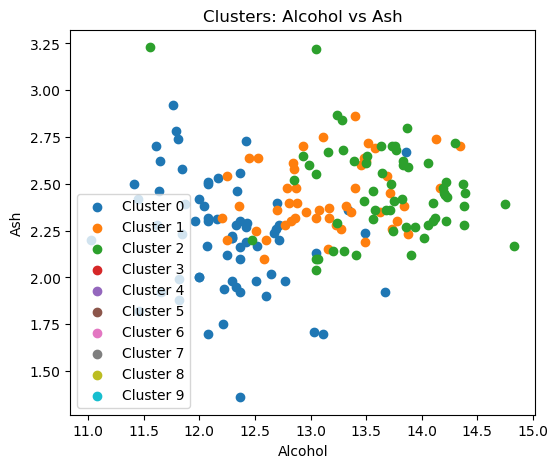

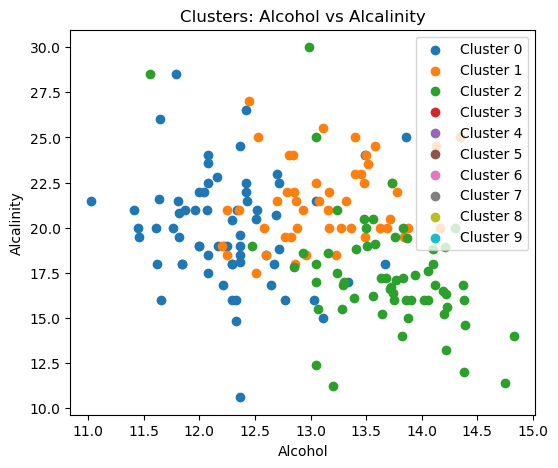

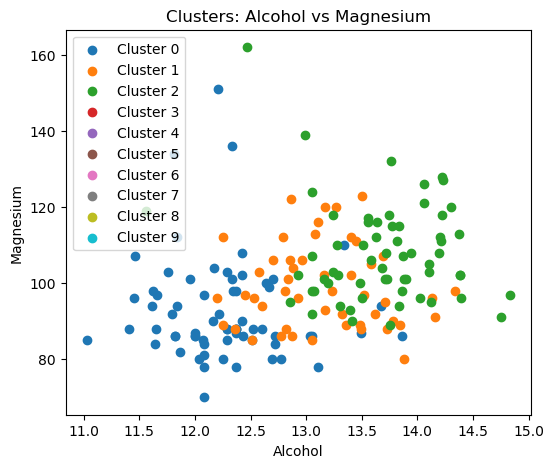

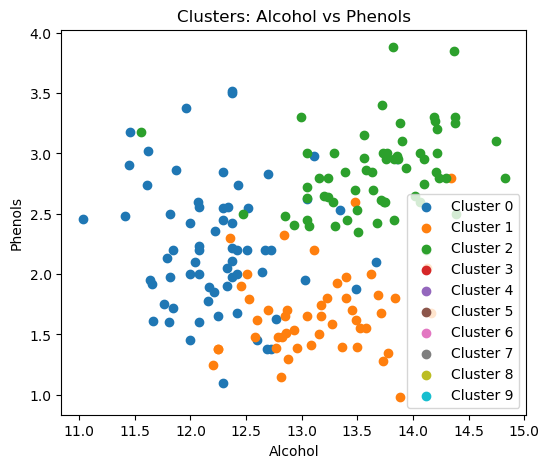

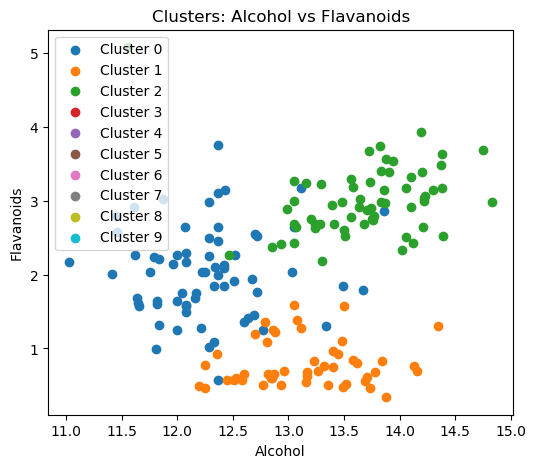

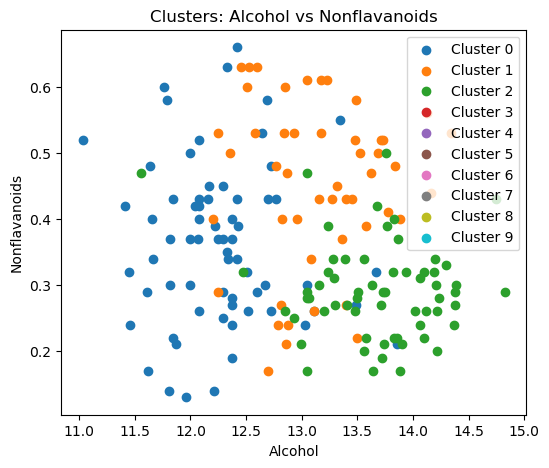

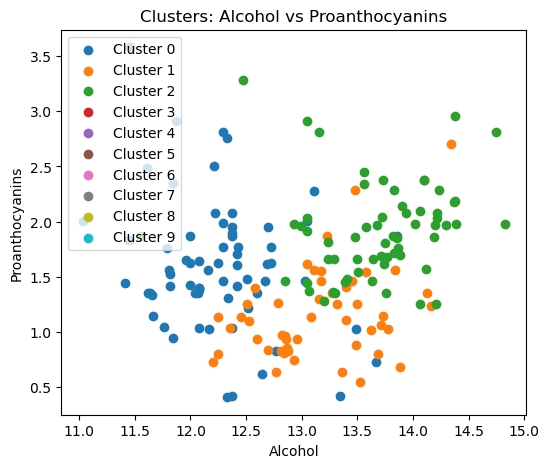

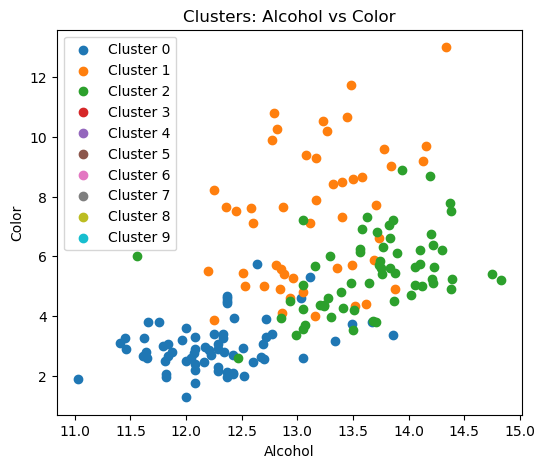

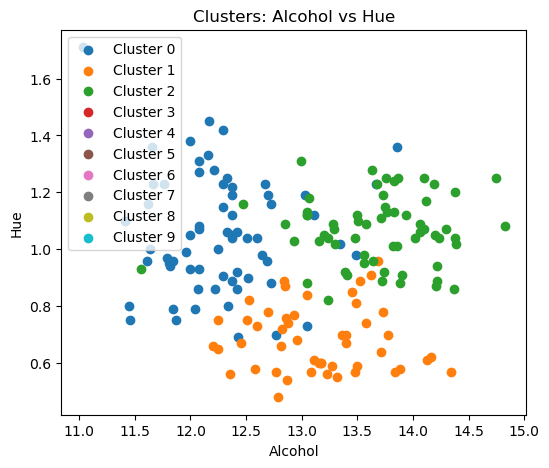

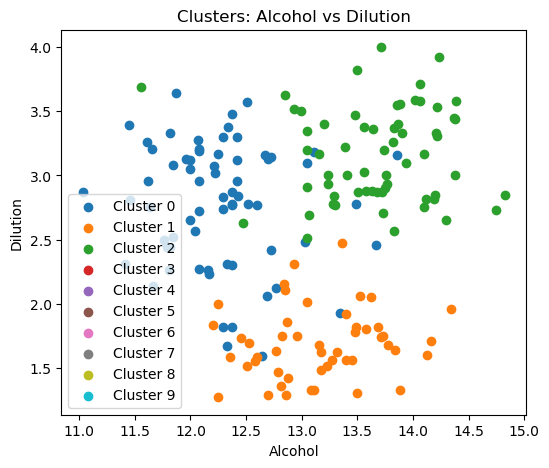

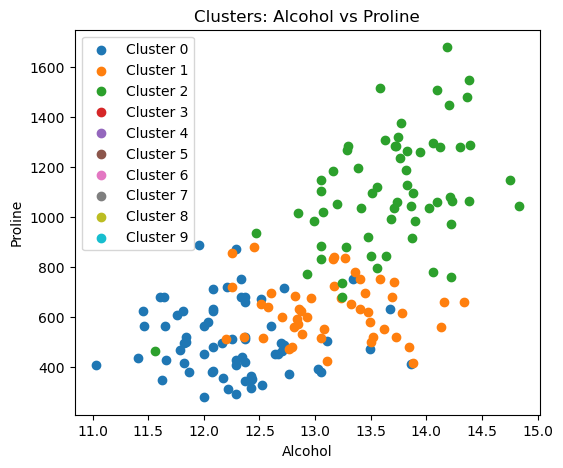

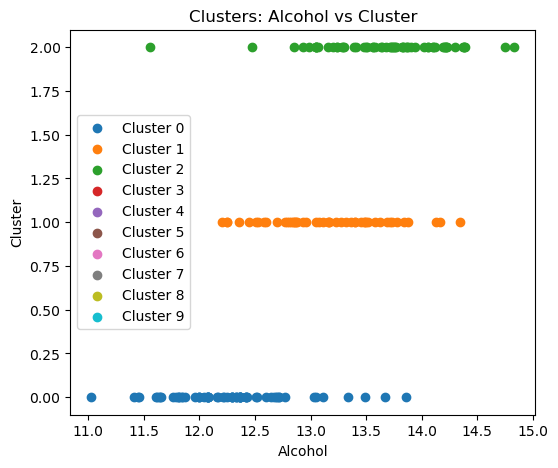

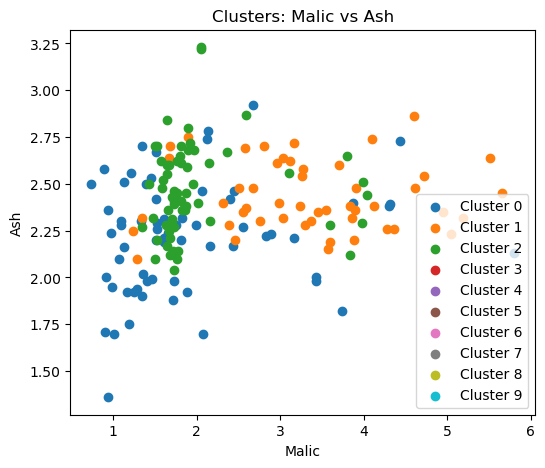

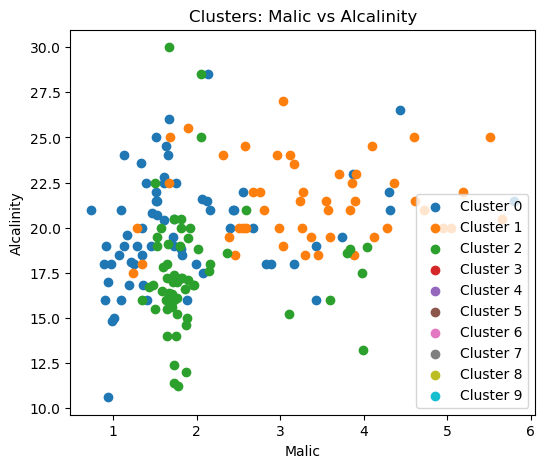

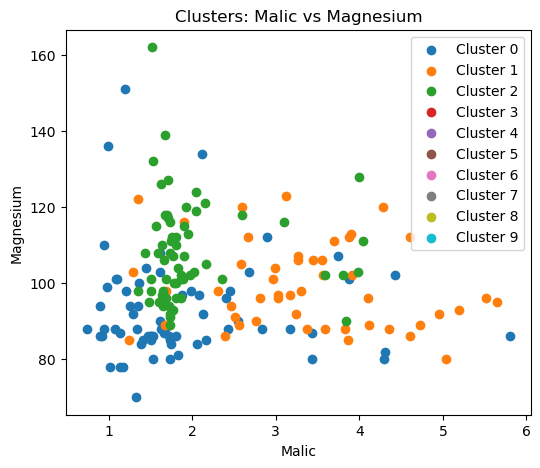

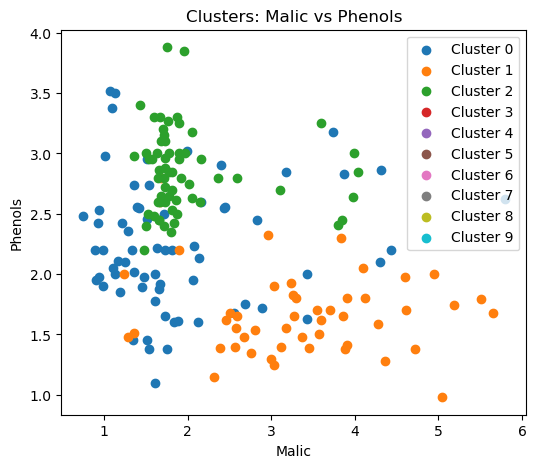

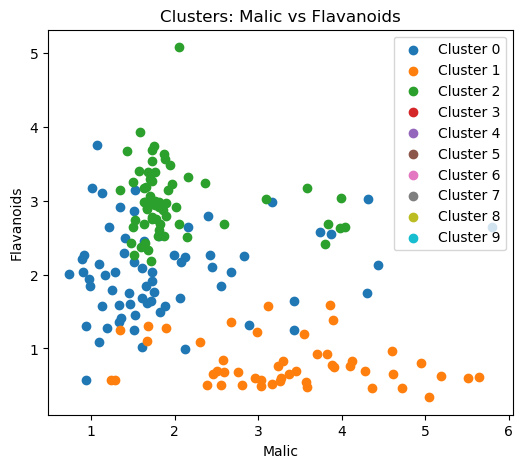

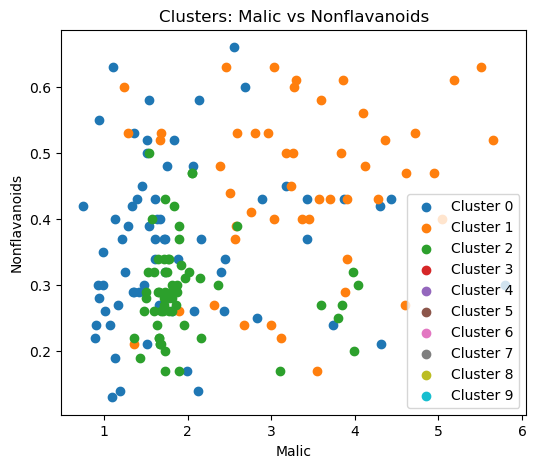

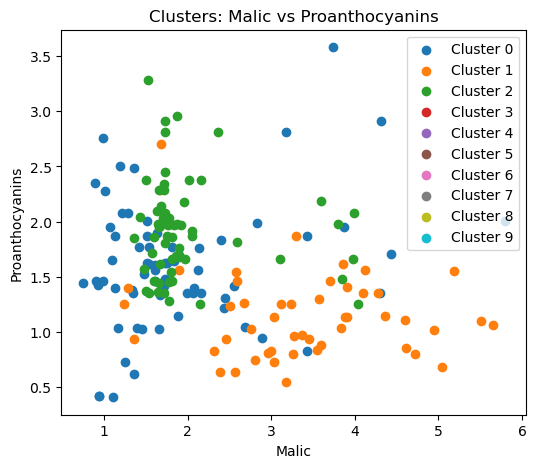

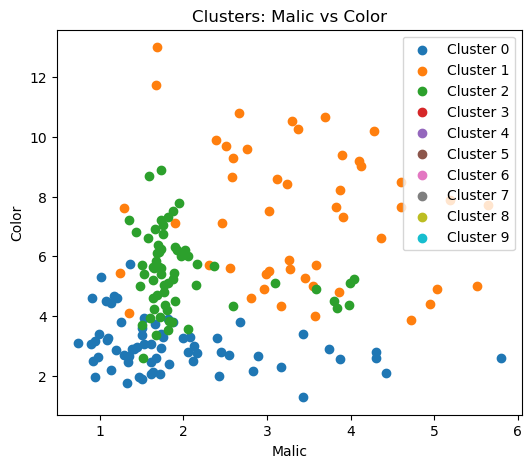

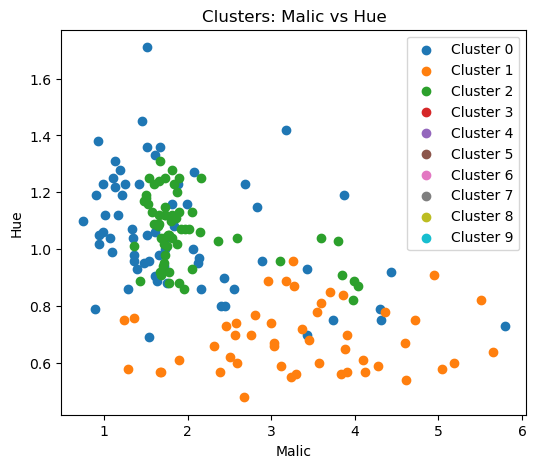

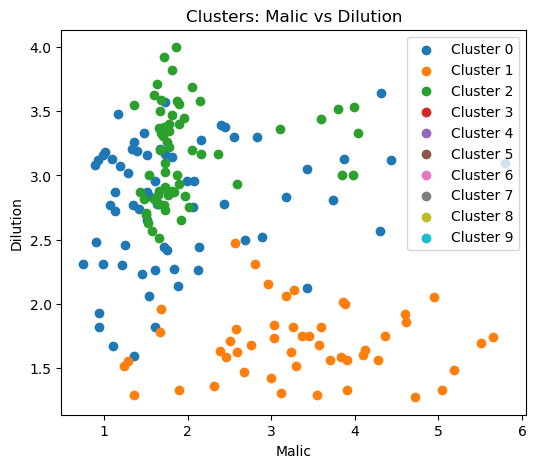

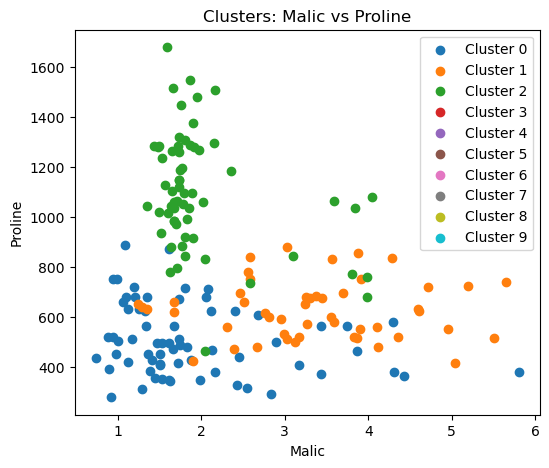

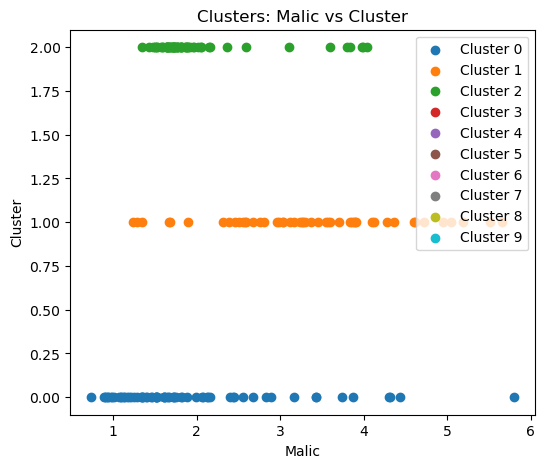

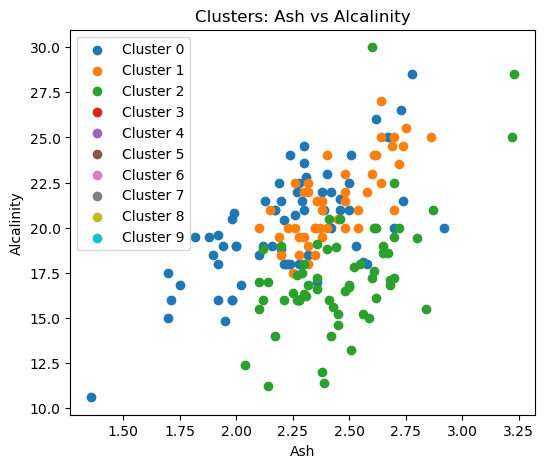

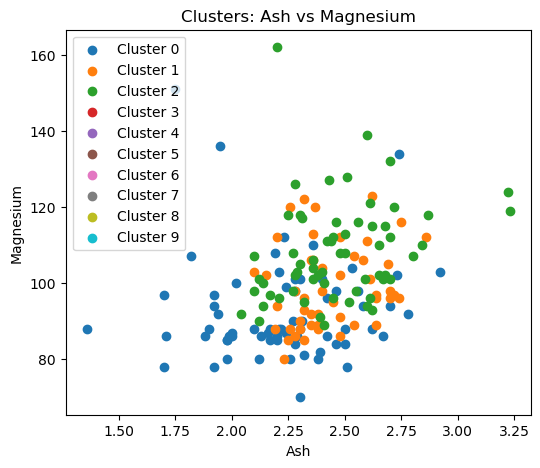

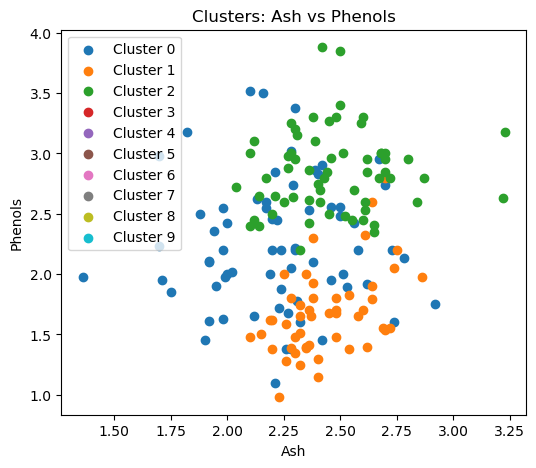

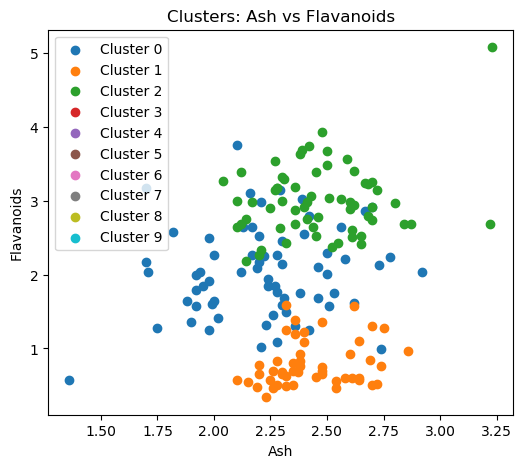

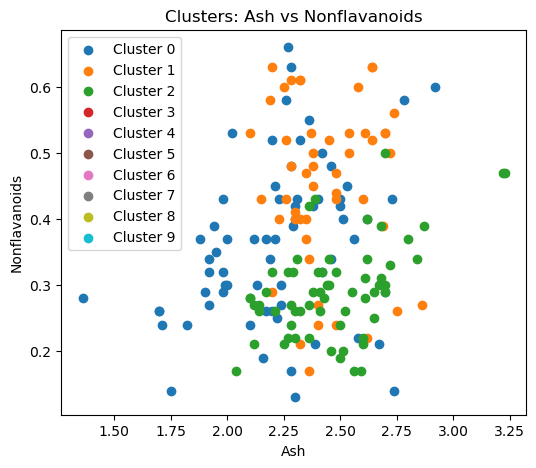

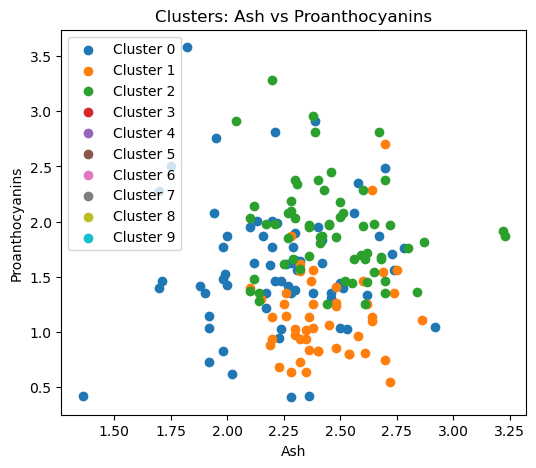

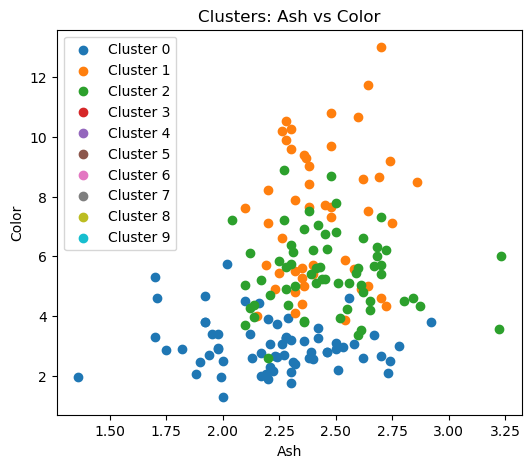

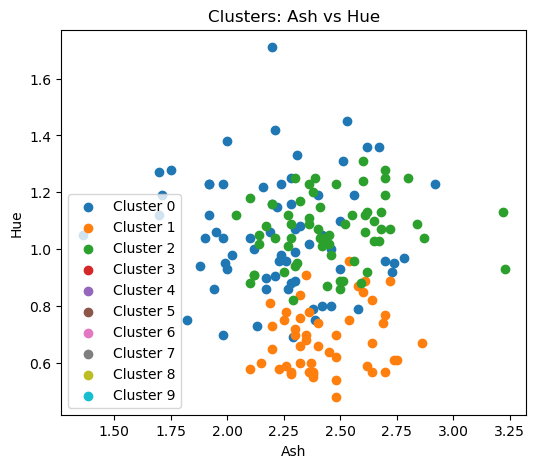

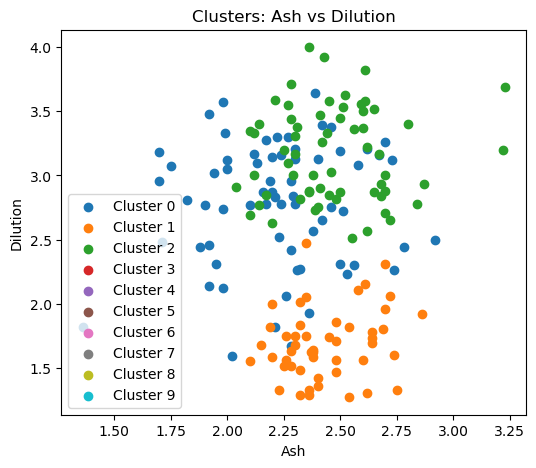

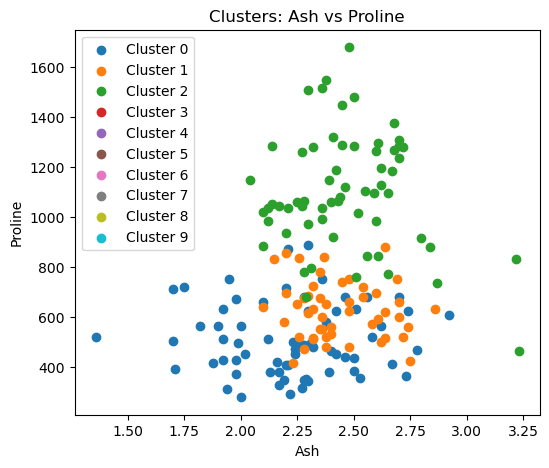

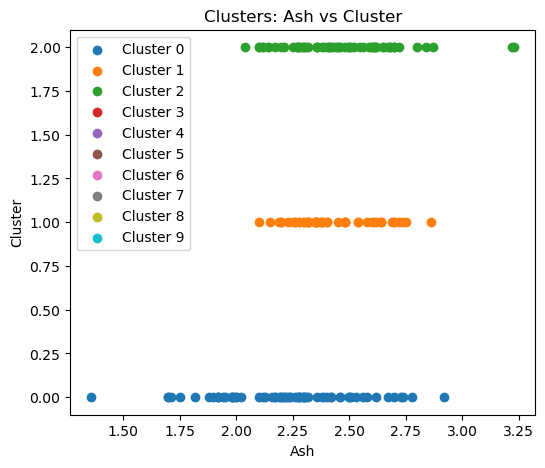

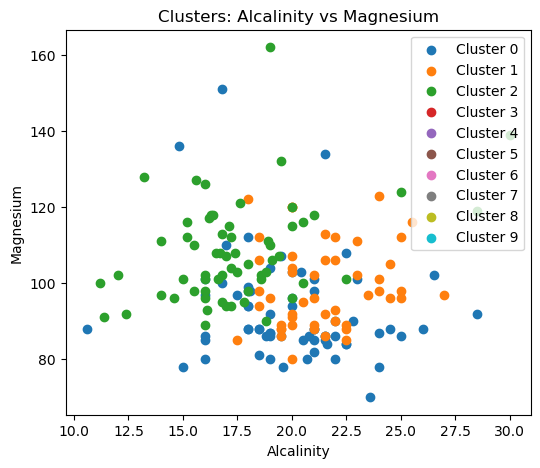

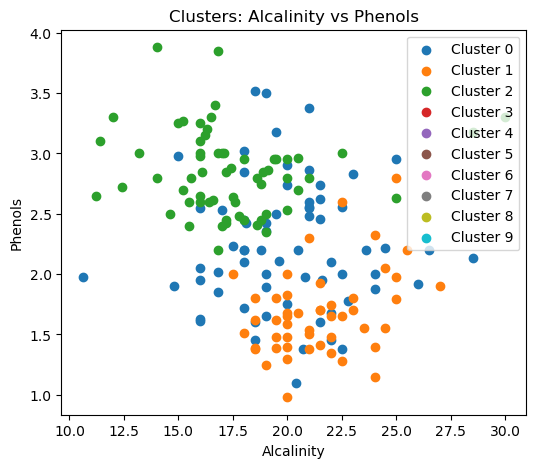

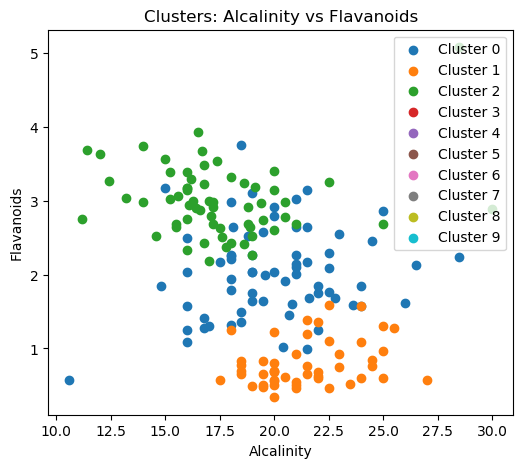

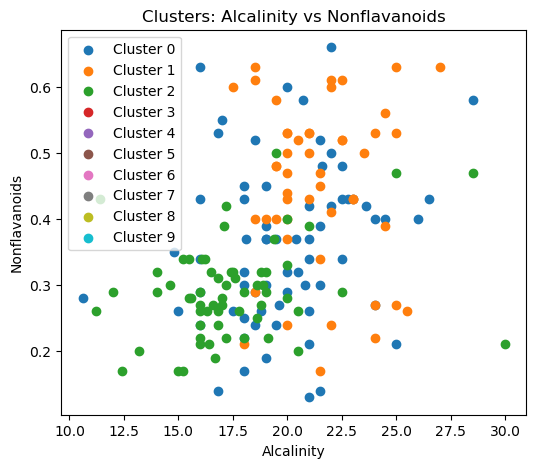

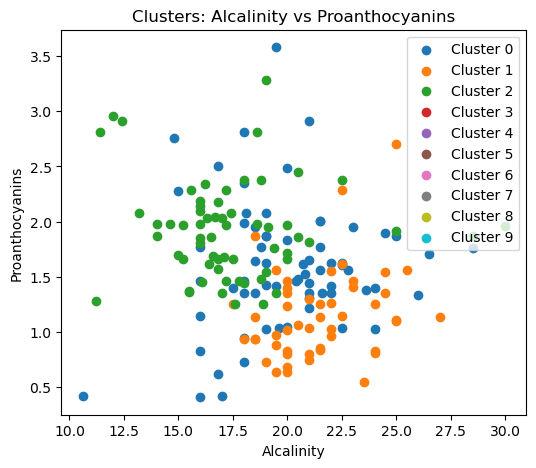

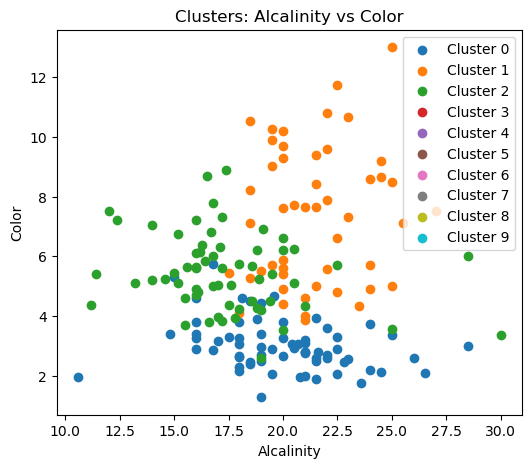

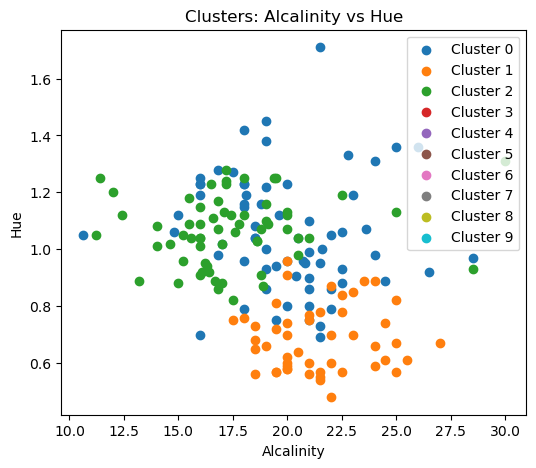

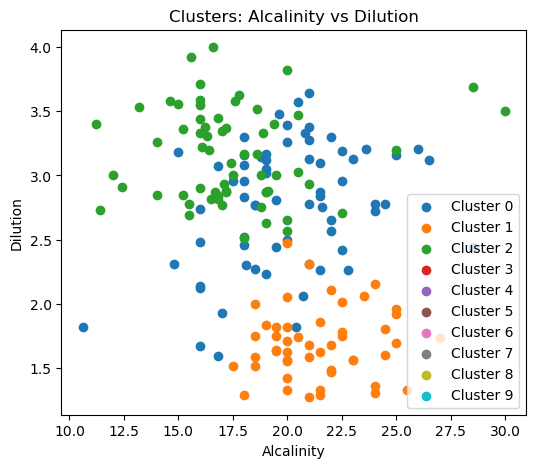

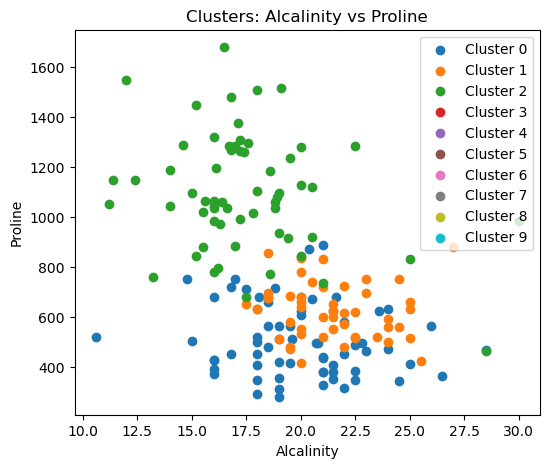

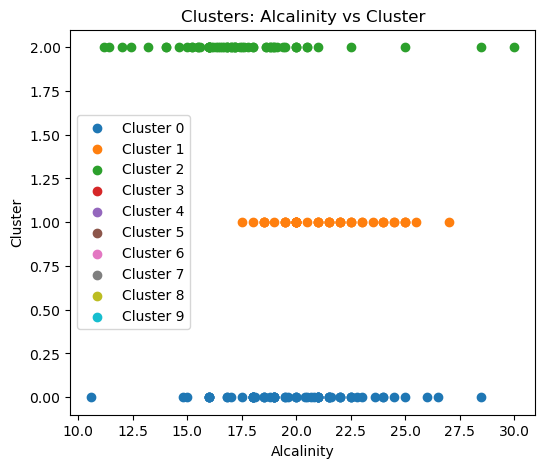

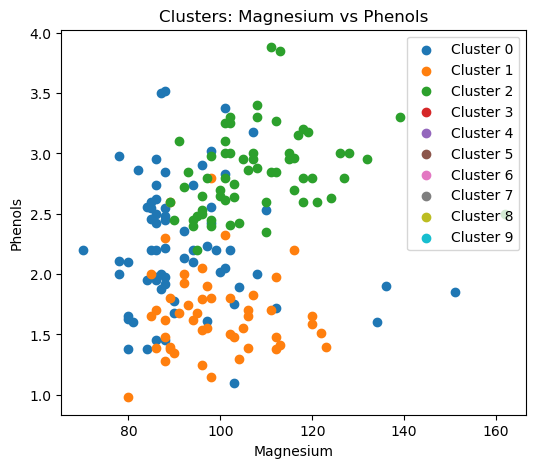

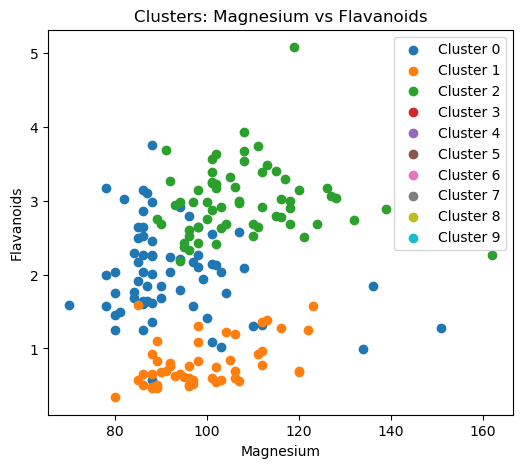

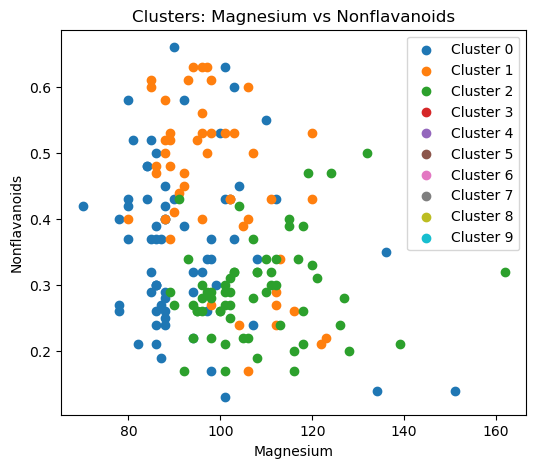

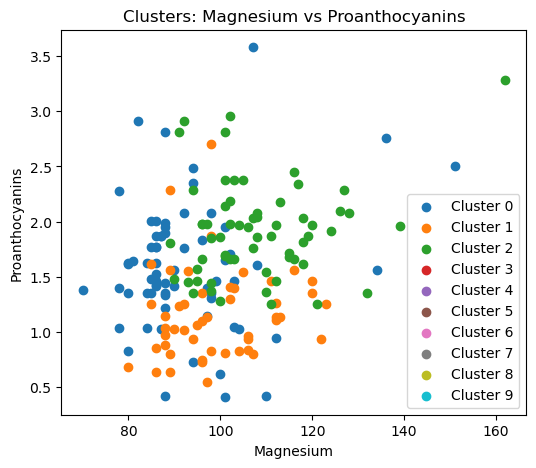

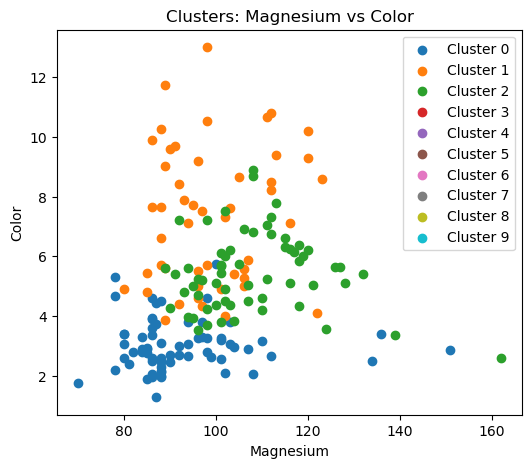

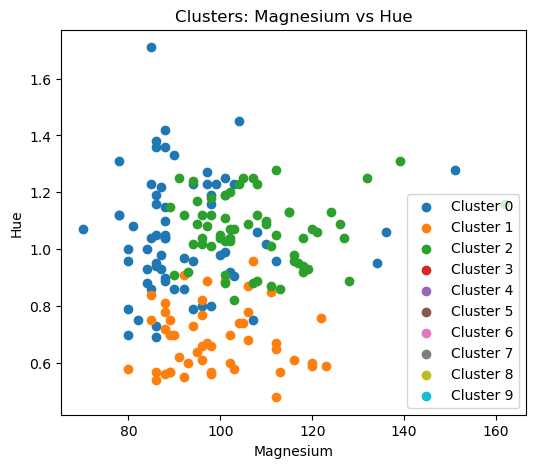

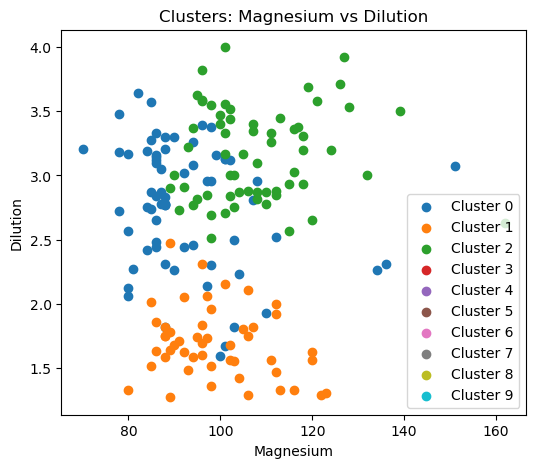

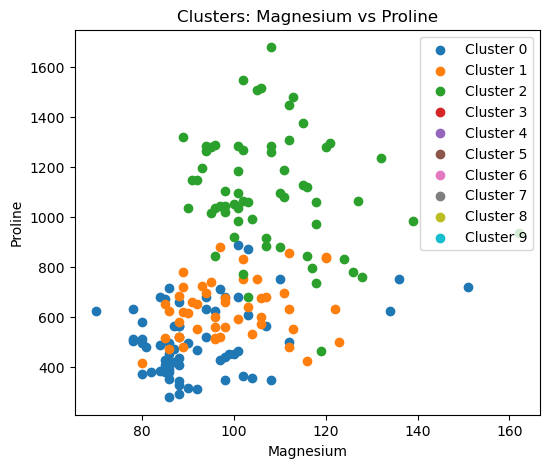

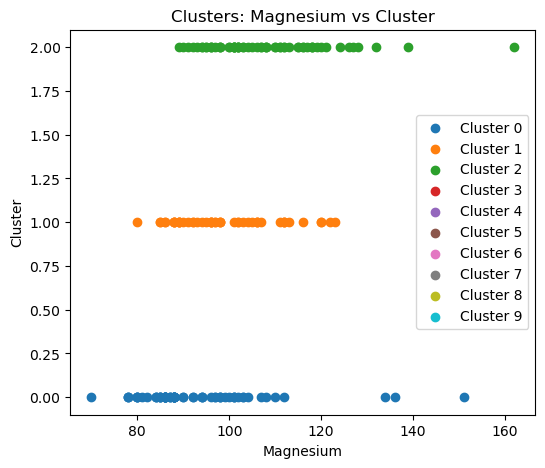

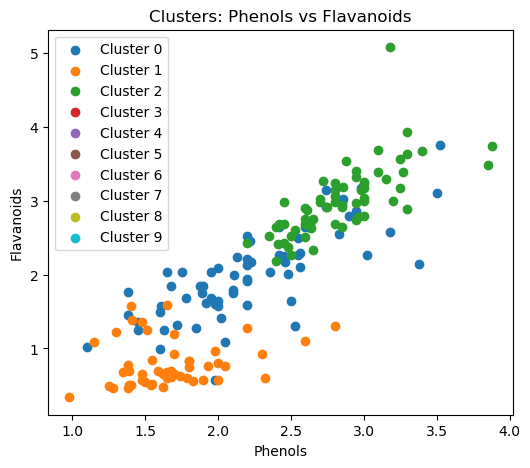

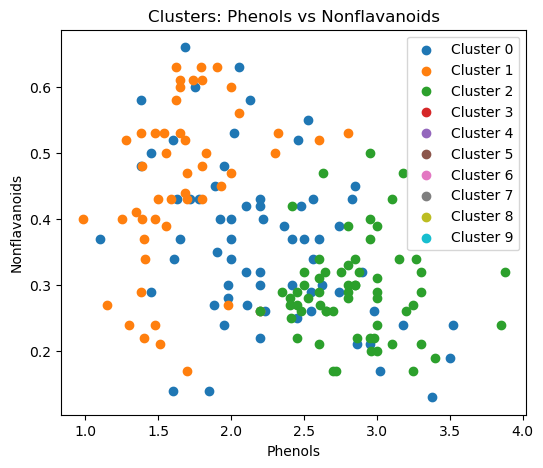

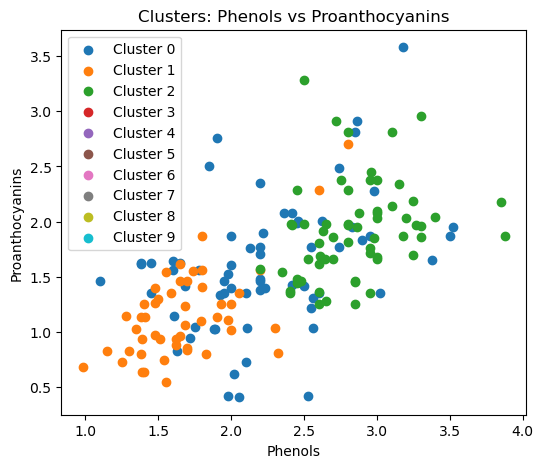

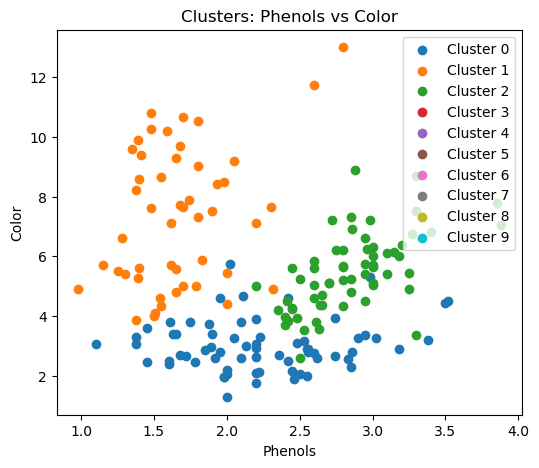

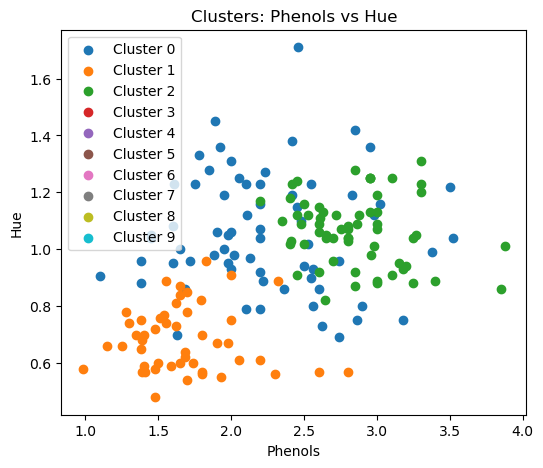

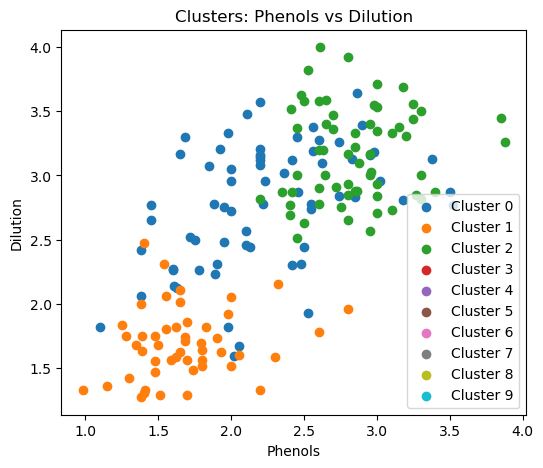

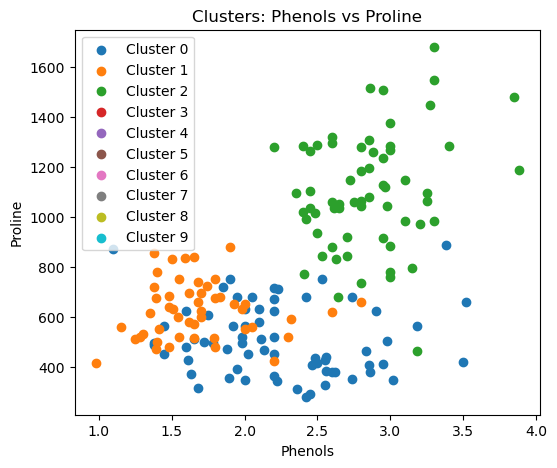

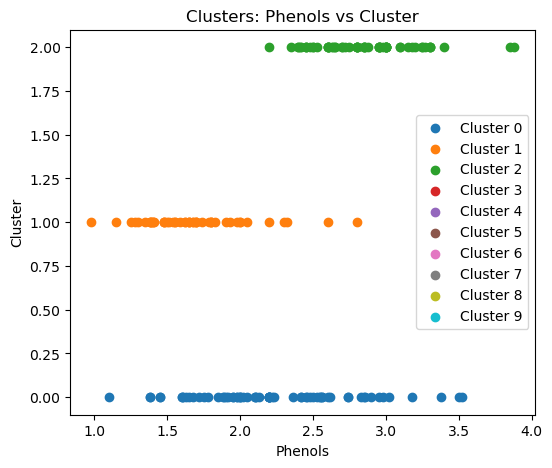

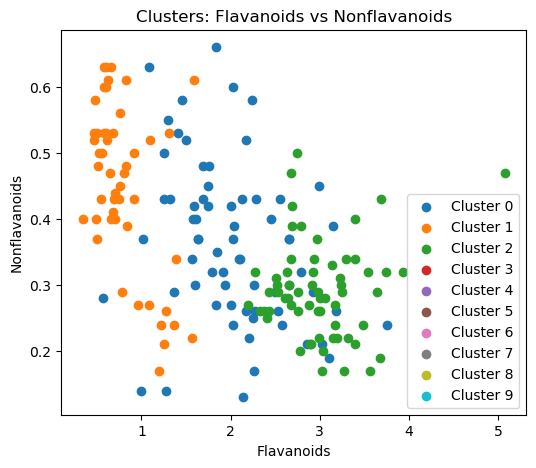

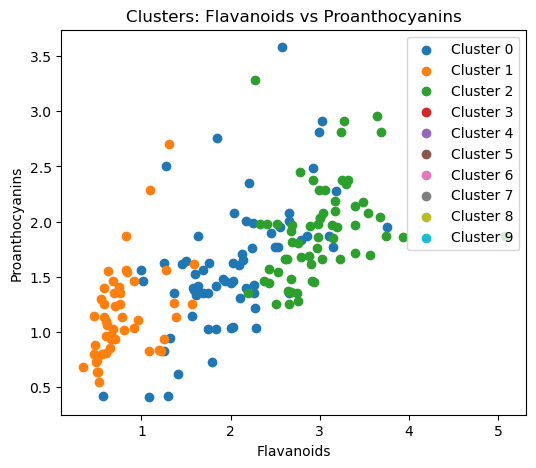

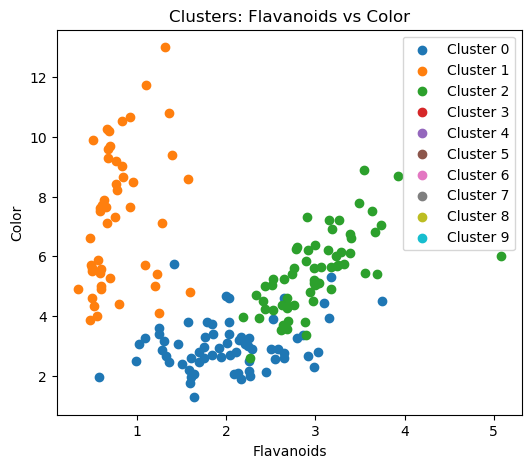

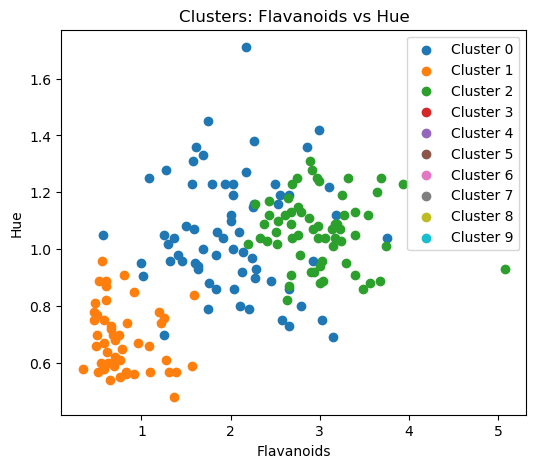

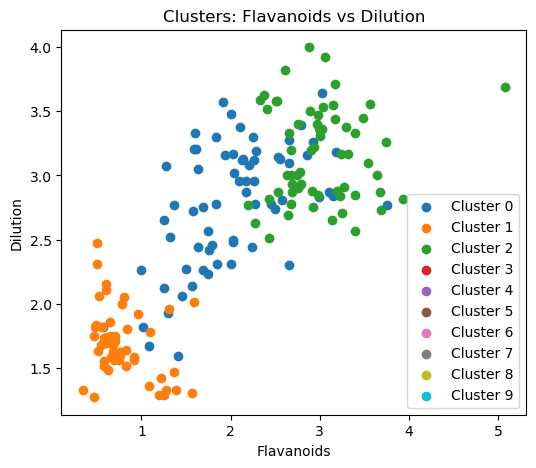

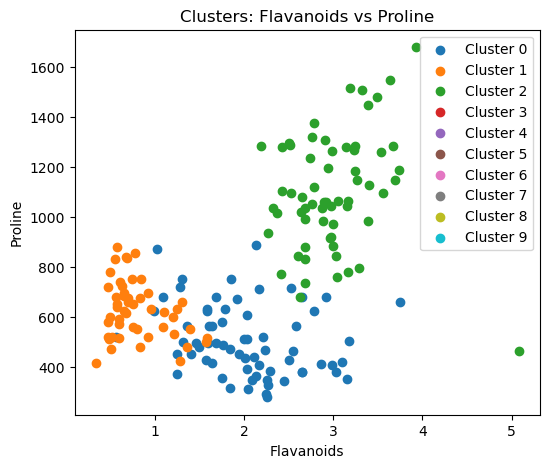

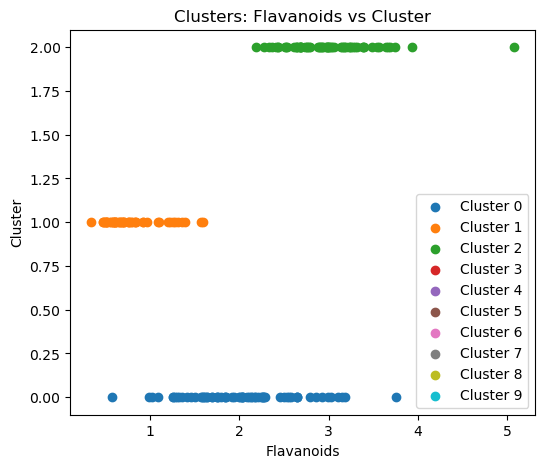

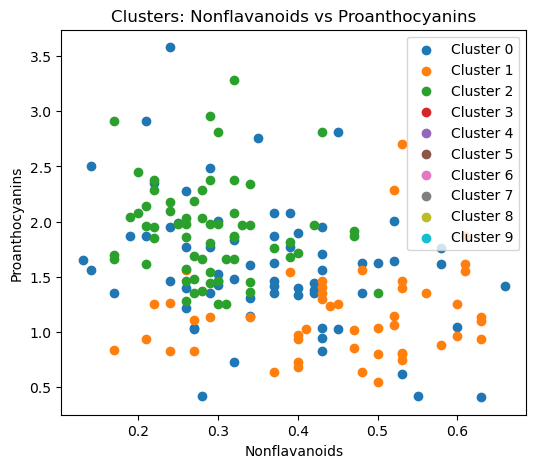

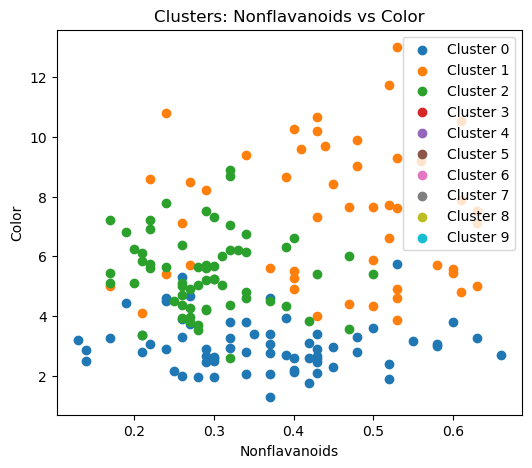

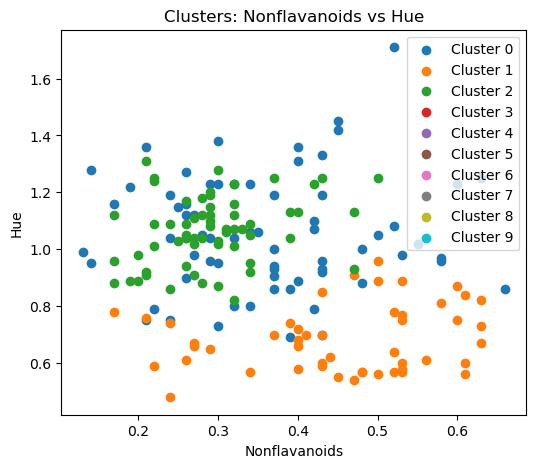

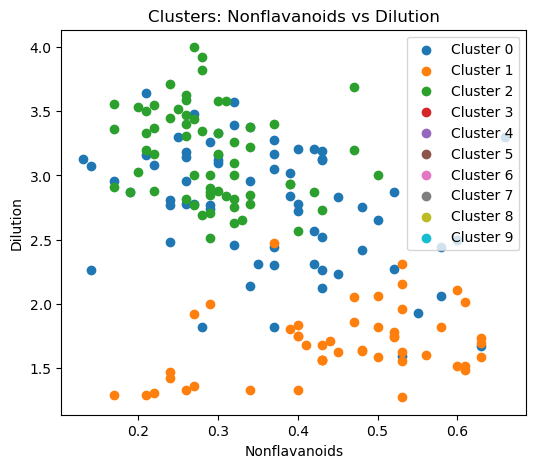

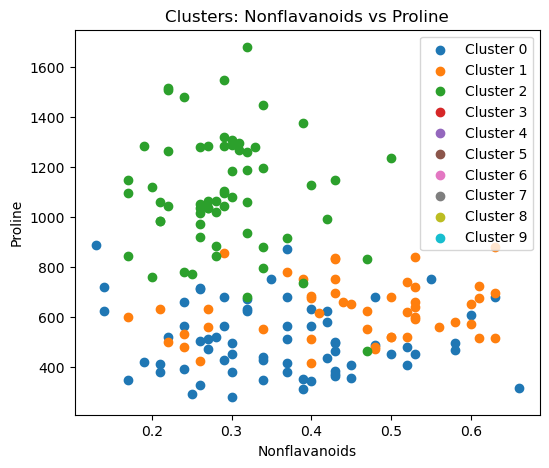

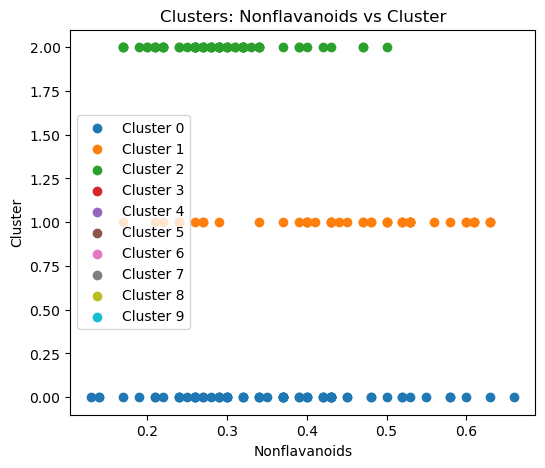

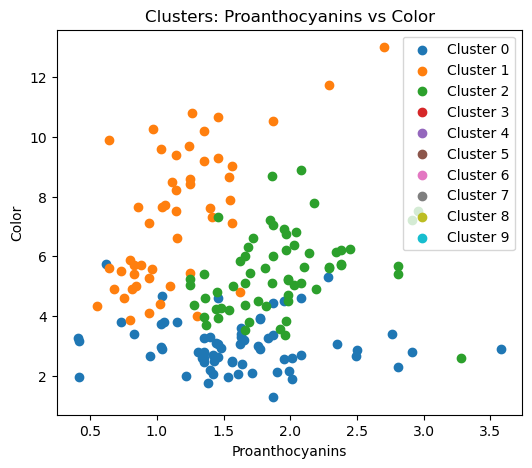

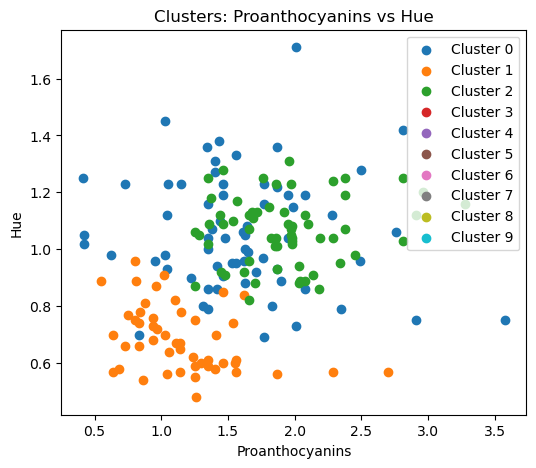

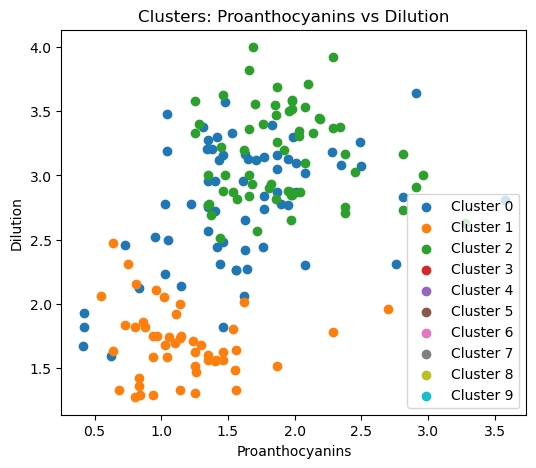

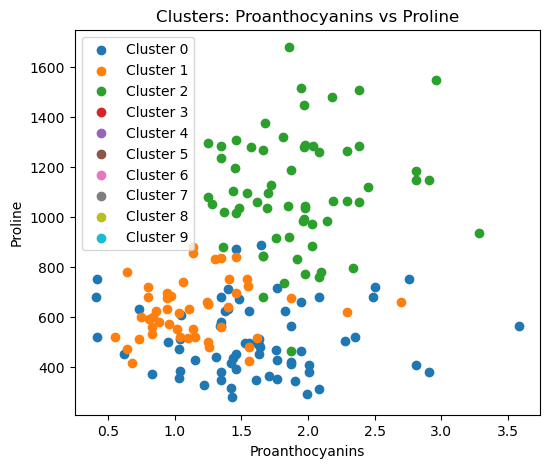

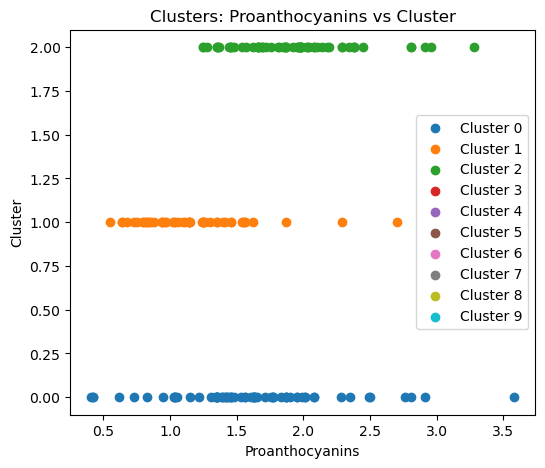

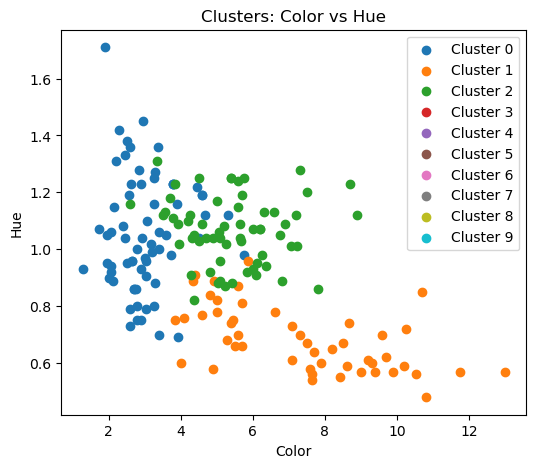

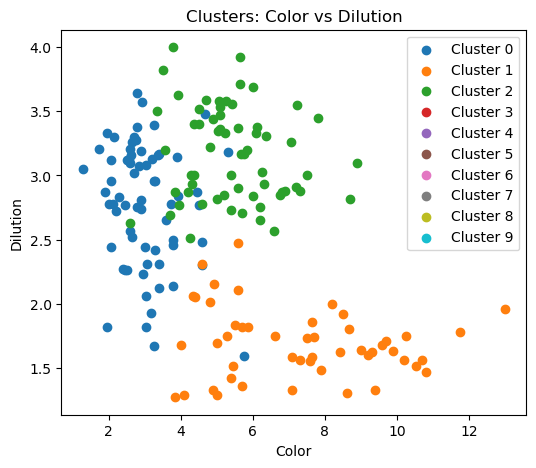

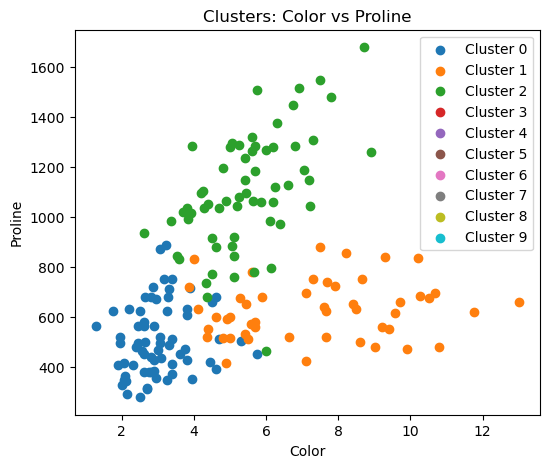

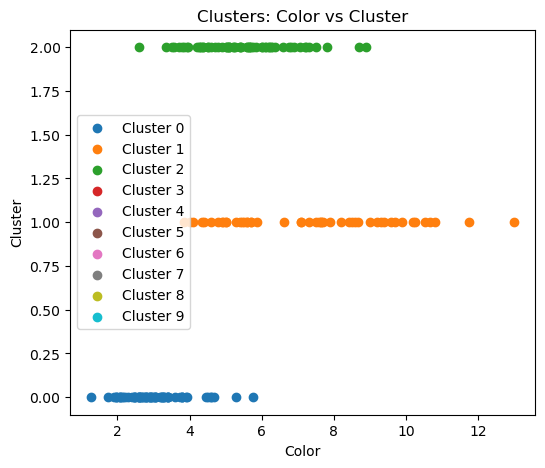

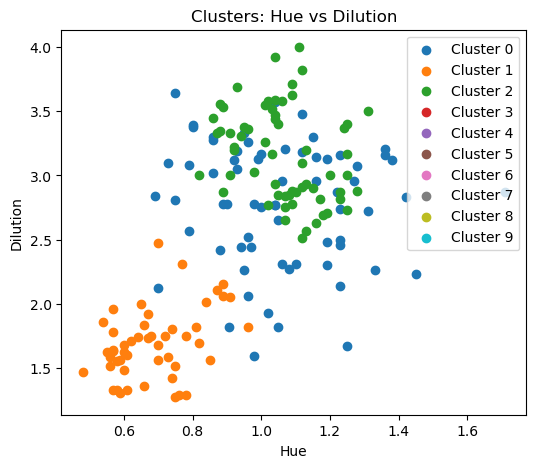

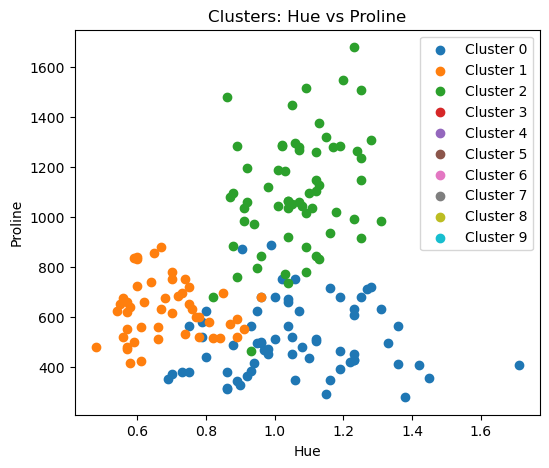

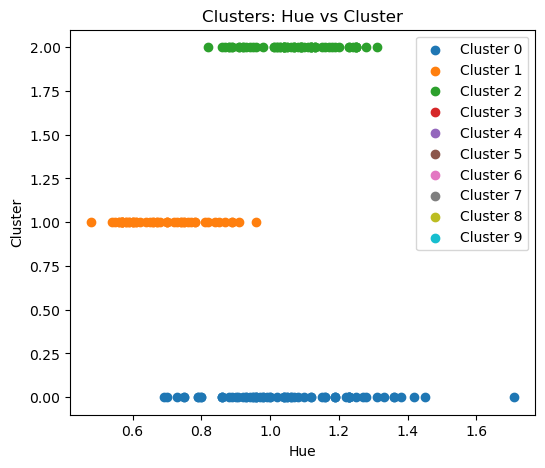

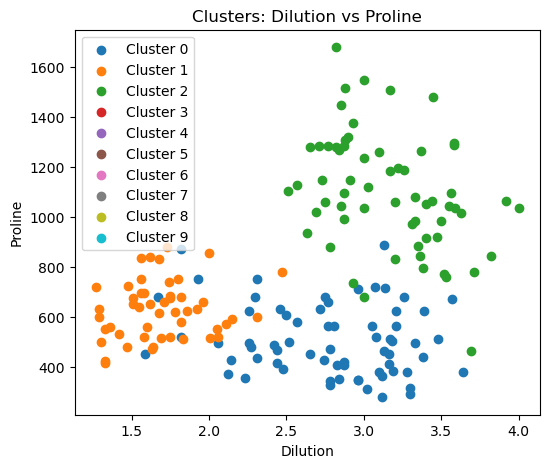

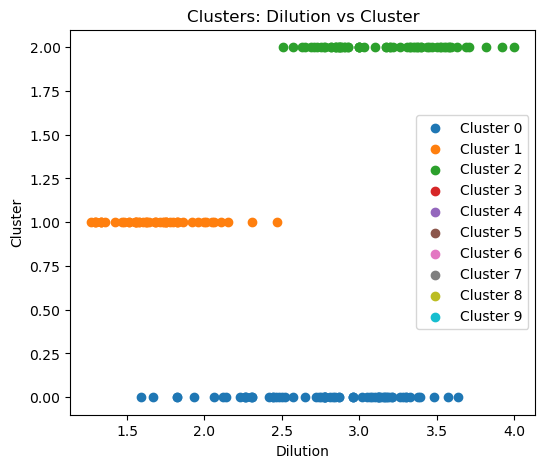

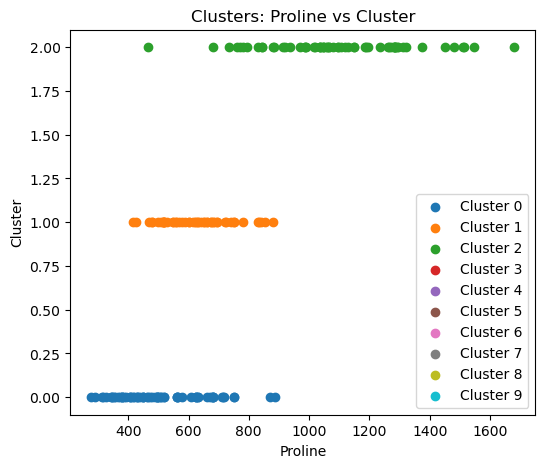

In [43]:
from itertools import combinations
from sklearn.decomposition import PCA

# ---------------------------------------
# 3. Reduce to 2 principal components for visualization
# ---------------------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# Step 3: Visualize clusters for all feature pairs
feature_names = df.columns[:-1]  # exclude the 'Cluster' column

for f1, f2 in combinations(feature_names, 2):
    plt.figure(figsize=(6,5))
    for cluster in range(k):
        plt.scatter(
            df[df['Cluster']==cluster][f1],
            df[df['Cluster']==cluster][f2],
            label=f'Cluster {cluster}'
        )
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f'Clusters: {f1} vs {f2}')
    plt.legend()
    plt.show()

In [37]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# -----------------------------
# 1. Silhouette Score
# -----------------------------
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3065


In [40]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

# Add cluster labels to original dataframe (optional)
df['Cluster_PCA'] = clusters_pca


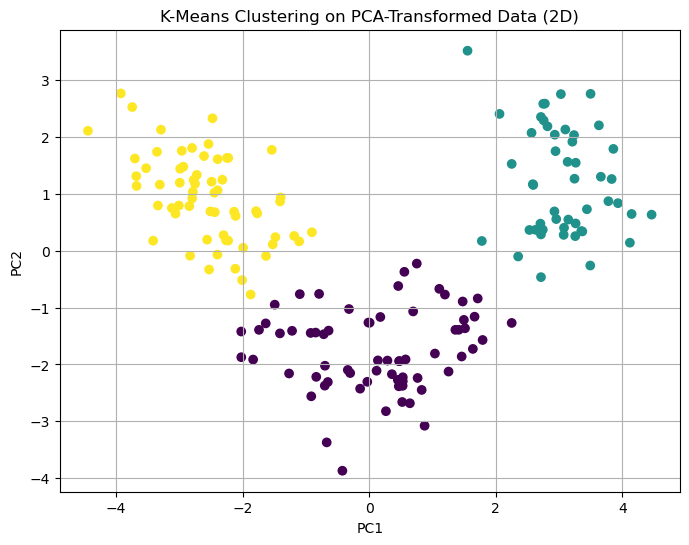

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(
    pca_data[:, 0],
    pca_data[:, 1],
    c=clusters_pca,
    cmap='viridis'
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering on PCA-Transformed Data (2D)")
plt.grid(True)
plt.show()


In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assume df is your dataset
# df = pd.read_csv("your_dataset.csv")  

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# K-Means on original data
k = 3
kmeans_orig = KMeans(n_clusters=k, random_state=42)
clusters_orig = kmeans_orig.fit_predict(X_scaled)

# Cluster evaluation metrics
silhouette_orig = silhouette_score(X_scaled, clusters_orig)
db_orig = davies_bouldin_score(X_scaled, clusters_orig)

print(f"Original Data - Silhouette Score: {silhouette_orig:.3f}, Davies-Bouldin Index: {db_orig:.3f}")


Original Data - Silhouette Score: 0.381, Davies-Bouldin Index: 1.113


In [50]:
from sklearn.decomposition import PCA

# Reduce to 2 or more components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means on PCA data
kmeans_pca = KMeans(n_clusters=k, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Cluster evaluation metrics
silhouette_pca = silhouette_score(X_pca, clusters_pca)
db_pca = davies_bouldin_score(X_pca, clusters_pca)

print(f"PCA Data - Silhouette Score: {silhouette_pca:.3f}, Davies-Bouldin Index: {db_pca:.3f}")


PCA Data - Silhouette Score: 0.716, Davies-Bouldin Index: 0.403


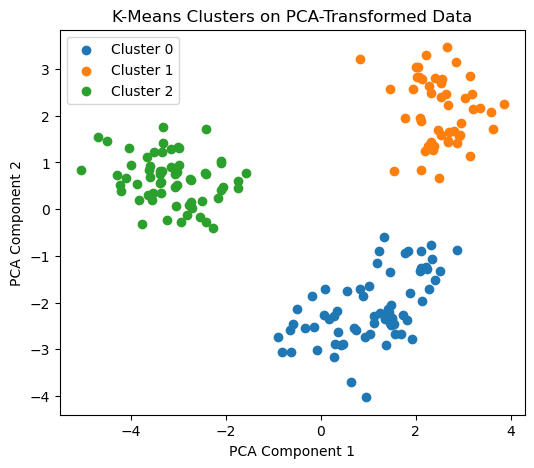

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
for cluster in range(k):
    plt.scatter(
        X_pca[clusters_pca == cluster, 0],
        X_pca[clusters_pca == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters on PCA-Transformed Data')
plt.legend()
plt.show()


In [58]:
"""Original data: The silhouette Score is higher if all features are importanat and in visualization shows real feature space 
PCA Data: The silhouette score is lightly lower if pca reduces importance variance and in visualization may be merge small clusters and easier to visualize,explainable"""

'Original data: The silhouette Score is higher if all features are importanat and in visualization shows real feature space \nPCA Data: The silhouette score is lightly lower if pca reduces importance variance and in visualization may be merge small clusters and easier to visualize,explainable'

In [59]:
""" Cluster Compactness: PCA reduces dimensionality,so clusters may appear more compressed or overlapping in the 2D PCA projection
Minor variations in original features might be lost, making some clusters look less tight than in the original space
Cluster Shapes:In the original data, clusters may have irregular shapes along the original features.
PCA tends to linearize clusters along the directions of maximum variance, which can change the apparent shape
Metric Differences:Silhouette Score may slightly decrease for PCA clusters if variance along discarded components was important for separation."""

' Cluster Compactness: PCA reduces dimensionality,so clusters may appear more compressed or overlapping in the 2D PCA projection\nMinor variations in original features might be lost, making some clusters look less tight than in the original space\nCluster Shapes:In the original data, clusters may have irregular shapes along the original features.\nPCA tends to linearize clusters along the directions of maximum variance, which can change the apparent shape\nMetric Differences:Silhouette Score may slightly decrease for PCA clusters if variance along discarded components was important for separation.'

In [61]:
"""Dimensional Reduction: postive impacts are noise reduction,improved visualization,computational efficiency
negative impacts are Information loss,metric changes,loss of interpretability,shape distotion"""

'Dimensional Reduction: postive impacts are noise reduction,improved visualization,computational efficiency\nnegative impacts are Information loss,metric changes,loss of interpretability,shape distotion'

In [63]:
""" PCA:computation is faster,reduced noise,interpretability is low,cluster accuracy can decrease if important low variance features are discarded , visualization is easy on 2D/3D,reduces curse of dimensionality
Original data Clustering: slower in high computation , sensitive to noise, high interpretability,Perserves all distinction,potentially more accurate, visaulization is Difficult in greater than 3 dimensions,High dimensionality can distort diatances"""

' PCA:computation is faster,reduced noise,interpretability is low,cluster accuracy can decrease if important low variance features are discarded , visualization is easy on 2D/3D,reduces curse of dimensionality\nOriginal data Clustering: slower in high computation , sensitive to noise, high interpretability,Perserves all distinction,potentially more accurate, visaulization is Difficult in greater than 3 dimensions,High dimensionality can distort diatances'

In [66]:
""" By applying the k-cluster analysis we get low silhouette score and we give importance to the original data but in visualization it is not giving perfect one.
But in PCA we use the dimensionality reduction and get more important features and visualiaztion is also good and the silhoutte score we get high as compared to k-mean clustering"""

' By applying the k-cluster analysis we get low silhouette score and we give importance to the original data but in visualization it is not giving perfect one.\nBut in PCA we use the dimensionality reduction and get more important features and visualiaztion is also good and the silhoutte score we get high as compared to k-mean clustering'

In [68]:
""" Practical Implemenatation of PCA are dimensionality reduction,computation efficiency,visualization
In Clustering are Pattern discovery , unsupervised learning ,scalability issues"""

' Practical Implemenatation of PCA are dimensionality reduction,computation efficiency,visualization\nIn Clustering are Pattern discovery , unsupervised learning ,scalability issues'

In [ ]:
""" PCA is used when the data is too high, preprocessing , computation efficiency 
Clustering is used 